In [1]:
import os
import pandas as pd
import dask.dataframe as dd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN, AgglomerativeClustering, SpectralClustering, KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA

import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input
# from keras.optimizers import Adam
# from keras.utils import to_categorical

# Functions for Plot

In [49]:
def plot_indice_reg(df_data, eje_y, name, title, INDICE, xlimites=None, ylimites=None, order=False, ax=None):

    if ax is None:
        fig, axs = plt.subplots(nrows=1, figsize=(8, 6), sharex=False)
    else:
        axs = ax

    colores = [sns.color_palette("Paired")[1], sns.color_palette("Paired")[3], sns.color_palette("Paired")[5],sns.color_palette("Paired")[7],sns.color_palette("Paired")[9]]
    for idx, regiao in enumerate(['Northeast','North','SE-CW', 'South', 'AC-RO']):
        if order:
            data = df_data.loc[:, :, regiao].sort_values(INDICE, ascending=False)[INDICE]
            data_points_per_day = 10
            num_days = (len(df_data)/5)*data_points_per_day / 100
            axs.set_xticks([round(i * num_days) for i in range(data_points_per_day+1)])
            axs.set_xticklabels([f'{i*10}' for i in range(data_points_per_day+1)], fontsize=12, rotation=0, ha='center')
            axs.set_xlabel('Percentage of half hours in a month (%)', fontsize=23)
        else:
            data = df_data.loc[:, :, regiao][INDICE]
            axs.set_xlabel('Operating Points', fontsize=23)
        
        axs.plot(data.values, color=colores[idx], label=regiao, lw=2, linestyle='-')
        
    axs.legend(loc='upper right', fontsize=18)
    axs.tick_params(axis='y', labelsize=24)
    axs.tick_params(axis='x', labelsize=24)
    axs.set_ylabel(eje_y, fontsize=22)
    axs.set_title(title, fontsize=22)
    if xlimites is not None:
        axs.set_xlim(xlimites)
    if ylimites is not None:
        axs.set_ylim(ylimites)
    axs.grid(True, linestyle='-', linewidth=1.2, alpha=0.4)
    plt.tight_layout()
    if ax is None:
        plt.show()

def plot_indice_dec(df_data, eje_y, title, xlimites=None, ylimites=None, order=False, ax=None):

    if ax is None:
        fig, axs = plt.subplots(nrows=1, figsize=(8, 6), sharex=False)
    else:
        axs = ax

    colores = [sns.color_palette("Paired")[1], sns.color_palette("Paired")[3], sns.color_palette("Paired")[5],sns.color_palette("Paired")[7],sns.color_palette("Paired")[9]]
    indicedic = {'DPI_(u)_PQ':['OV DPI_PQ',r'$\mathrm{DPI}_\mathrm{PQ}^\mathrm{u}$'],
             'DPI_(l)_PQ': ['UV DPI_PQ',r'$\mathrm{DPI}_\mathrm{PQ}^\mathrm{l}$'],
             'DPI_(u)_PV':['OV DPI_PV',r'$\mathrm{DPI}_\mathrm{PV}^\mathrm{u}$'],
            'DPI_(l)_PV': ['UV DPI_PV', r'$\mathrm{DPI}_\mathrm{PV}^\mathrm{l}$']}

    for idx, indices in enumerate(indicedic.keys()):
        if order:
            data = df_data.sort_values([indicedic[indices][0]], ascending=False)[indicedic[indices][0]]
            data_points_per_day = 10
            num_days = (len(df_data)/5)*data_points_per_day / 100
            axs.set_xticks([round(i * num_days) for i in range(data_points_per_day+1)])
            axs.set_xticklabels([f'{i*10}' for i in range(data_points_per_day+1)], fontsize=12, rotation=0, ha='center')
            axs.set_xlabel('Percentage of half hours in a month (%)', fontsize=23)
        else:
            data = df_data[indicedic[indices][0]]
            axs.set_xlabel('Operating Points', fontsize=23)
        
        axs.plot(data.values, color=colores[idx], label=indices, lw=2, linestyle='-')
        
    axs.legend(loc='upper right', fontsize=18)
    axs.tick_params(axis='y', labelsize=24)
    axs.tick_params(axis='x', labelsize=24)
    axs.set_ylabel(eje_y, fontsize=22)
    axs.set_title(title, fontsize=22)
    if xlimites is not None:
        axs.set_xlim(xlimites)
    if ylimites is not None:
        axs.set_ylim(ylimites)
    axs.grid(True, linestyle='-', linewidth=1.2, alpha=0.4)

    if ax is None:
        plt.show()
        
def plot_indice (df_data, eje_y, name, title, INDICE, xlimites=None,ylimites=None, order = False, ax=None):
    
    if ax is None:
        fig, axs = plt.subplots(nrows=1, figsize=(10, 6), sharex=False)
    else:
        axs = ax

    colores = [sns.color_palette("Paired")[5], sns.color_palette("Paired")[1], sns.color_palette("Paired")[3]]
    # for idx, cenario in enumerate(['Cenario Baixa','Cenario Média','Cenario Alta']):      
    #     if order:
    #         data = df_data.loc[:, :, cenario].sort_values(INDICE, ascending=False)[INDICE]
    #         data_points_per_day = 10
    #         num_days = (len(df_data))*data_points_per_day / 100
    #         axs.set_xticks([round(i * num_days) for i in range(data_points_per_day+1)])
    #         axs.set_xticklabels([f'{i*10}' for i in range(data_points_per_day+1)], fontsize=12, rotation=0, ha='center')
    #         axs.set_xlabel('Percentage of half hours in a month (%)', fontsize=23)
    #     else:
    #         data = df_data.loc[:, :, cenario][INDICE]
    #         axs.set_xlabel('Operating Points', fontsize=23)
        
    #     axs.plot(data.values, color=colores[idx], label=cenario, lw=2, linestyle='-')

     
    if order:
        data = df_data.sort_values(INDICE, ascending=False)[INDICE]
        data_points_per_day = 10
        num_days = (len(df_data))*data_points_per_day / 100
        axs.set_xticks([round(i * num_days) for i in range(data_points_per_day+1)])
        axs.set_xticklabels([f'{i*10}' for i in range(data_points_per_day+1)], fontsize=12, rotation=0, ha='center')
        axs.set_xlabel('Percentage of half hours in a month (%)', fontsize=23)
    else:
        data = df_data[INDICE]
        axs.set_xlabel('Operating Points', fontsize=23)
    

    
    area_trapezoidal = np.trapz(data.values)/len(data)
    media = np.mean(data.values)
    axs.plot(data.values, color=colores[1], label='Todos os Cenarios', lw=2, linestyle='-')
        
    axs.legend(loc='upper right', fontsize=18)
    axs.tick_params(axis='y', labelsize=24)
    axs.tick_params(axis='x', labelsize=24)
    axs.set_ylabel(eje_y, fontsize=22)
    axs.set_title(f'{title} normalized area/mean: {area_trapezoidal, media}', fontsize=15)
    if xlimites is not None:
        axs.set_xlim(xlimites)
    if ylimites is not None:
        axs.set_ylim(ylimites)
    axs.grid(True, linestyle='-', linewidth=1.2, alpha=0.4)
    plt.tight_layout()
    if ax is None:
        plt.show()
    return area_trapezoidal

def boxplot_linhas(df, clase, yvalue, titulo, xlbl, ylbl, hue_ , ylim = None, legendPos = False):
    df = df.reset_index()
    plt.figure(figsize=(12, 6))
    boxplot = sns.boxplot(data=df, x=clase, y=yvalue, hue = hue_, width=0.7, linewidth=1, gap=.05, palette = "rainbow")
    plt.axhline(1, color='red', linestyle='--' ,  alpha=0.7)
    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=15)
    plt.ylabel(ylbl, fontsize=15)
    plt.tick_params(axis='both', labelsize=12)
    if legendPos:
        plt.legend(title='Clase', bbox_to_anchor=(1.22, 1), loc='upper right')
    else:
        plt.legend(title='Clase',loc='best')
    if ylim !=  None:
        plt.ylim(ylim)
    plt.grid()
    plt.show()

# Data Processing

In [3]:
dic_cenarios = {
                # 'V1A1F2 Scenario 2026' :'D:/0 FERV/0 Dados PYTHON/CASOS 2026/V1A1F_/REV_1/Simulation Results/p_2/V1A1F2_RESP_FNS_lim_rev1_2026/',
                # 'V1A1F3 Scenario 2026' :'D:/0 FERV/0 Dados PYTHON/CASOS 2026/V1A1F_/REV_1/Simulation Results/p_2/V1A1F3_RESP_FNS_lim_rev1_2026/',
                # 'V1A1F4 Scenario 2026' :'D:/0 FERV/0 Dados PYTHON/CASOS 2026/V1A1F_/REV_1/Simulation Results/p_2/V1A1F4_RESP_FNS_lim_rev1_2026/',
                # 'V1A1F5 Scenario 2026' :'D:/0 FERV/0 Dados PYTHON/CASOS 2026/V1A1F_/REV_1/Simulation Results/p_2/V1A1F5_RESP_FNS_lim_rev1_2026/',
                # 'V1A1F2 Scenario 2026' :'D:/0 FERV/0 Dados PYTHON/CASOS 2026/V1A1F_/REV_1/Simulation Results/p_supremo/V1A1F2_RESP_FNS_lim_rev1_2026/',
                # 'V1A1F3 Scenario 2026' :'D:/0 FERV/0 Dados PYTHON/CASOS 2026/V1A1F_/REV_1/Simulation Results/p_supremo/V1A1F3_RESP_FNS_lim_rev1_2026/',
                # 'V1A1F4 Scenario 2026' :'D:/0 FERV/0 Dados PYTHON/CASOS 2026/V1A1F_/REV_1/Simulation Results/p_supremo/V1A1F4_RESP_FNS_lim_rev1_2026/',
                # 'V1A1F5 Scenario 2026' :'D:/0 FERV/0 Dados PYTHON/CASOS 2026/V1A1F_/REV_1/Simulation Results/p_supremo/V1A1F5_RESP_FNS_lim_rev1_2026/',
                'V1A1F2 Scenario 2022 FNS' : 'D:/0 FERV/0 Dados PYTHON/CASOS 2022_novos/Results/V1A1F2 FNS Lim 2022_ultimos_corrigidos/',
                'MPA 2022 FNS Lim Scenario' : 'D:/0 FERV/0 Dados PYTHON/Cenarios HPPA PRE-QUALI/Simulation Results/MPV_(FNS Lim)_RC/'
                }

dirGeral = 'Data/Geral/'
dirIndice = 'Data/Indice/'
dirRamos = 'Data/Fluxo em Ramos/'
dirPotencia = 'Data/Potencia/'

filenames = [
                (dirGeral + 'OPF_NC.csv', 'OPF_NC'), 
                (dirGeral + 'PWF_NC.csv', 'PWF_NC'),
                (dirGeral + 'Df_ger.csv', 'ger'), 
                (dirGeral + 'Df_nt.csv', 'nt'), 
                (dirRamos + 'Df_Linhas.csv', 'linhas'), 
                (dirRamos + 'Df_Trafo.csv', 'Trafo'), 
                (dirRamos + 'DF_Intercambios.csv', 'intercambios'), 
                (dirRamos + 'DF_HVDC.csv', 'HVDC'), 
                (dirIndice + 'Df_DPI_S2.csv', 'Index'), 
                (dirIndice +'Df_DPI_S4.csv', 'Index_PO'), 
                (dirIndice + 'Df_DPI_S3.csv', 'Index_Modif'), 
                (dirIndice +'Df_PQ_DPI_S1.csv', 'IndexDec_PQ'), 
                (dirIndice +'Df_PV_DPI_S1.csv', 'IndexDec_PV'), 
                (dirPotencia+'Df_MW-MVAR_PO.csv', 'pot_mw_mvar'),  
                (dirPotencia+'Df_Reserva_PO_MW.csv', 'pot_mw_reserv'), 
                (dirPotencia+'Df_Reserva_PO_MVAR.csv', 'pot_mvar_reserv'),
                (dirPotencia+'DF_POT_Reg.csv', 'ger_reg'),
            ]

intense_palette = sns.color_palette("bright", 10)  # You can adjust the number of colors as needed
namescenarios = {key:[key,intense_palette[idx]] for idx, key in enumerate(dic_cenarios.keys())}

In [27]:
# Function to calculate indices for lines
def IndiceLinhas(df, n):
    df_filtered = df.loc[
        ~(df['L1(MVA)'] == 9999) & df['VBASEKV'].isin([230, 345, 440, 500, 525, 765])
    ].copy()
    df_filtered['MW_Flow'] = np.where(
        df_filtered['MW:From-To'] >= 0, df_filtered['MW:From-To'], df_filtered['MW:To-From']
    )
    df_filtered['PI_mva'] = (df_filtered['% L1'] / 100) ** (2 * n)

    # Group by multiple columns and aggregate
    df_r_nt = df_filtered.groupby(
        ['Dia', 'Hora', 'Cenario', 'REG', 'VBASEKV']
    ).agg({'MW_Flow': 'sum', 'MVA': 'sum', 'PI_mva': 'sum'})
    df_r = df_filtered.groupby(
        ['Dia', 'Hora', 'Cenario', 'REG']
    ).agg({'MW_Flow': 'sum', 'MVA': 'sum', 'PI_mva': 'sum'})
    df_po = df_filtered.groupby(
        ['Dia', 'Hora', 'Cenario']
    ).agg({'MW_Flow': 'sum', 'MVA': 'sum', 'PI_mva': 'sum'})

    # Calculate PFI
    for df in [df_r_nt, df_r, df_po]:
        df['PFI'] = df['MW_Flow'] / df['MVA']
        df['PI_mva'] = df['PI_mva'] ** (1 / (2 * n))

    return df_r_nt, df_r, df_po

# Function to flatten DataFrame
def flatdf(df, BG):
    df_reordered = df.reorder_levels(['Dia', 'Hora', 'Cenario', 'REG', BG])
    regionmap = {
        'Nordeste': 'Northeast', 'Norte': 'North', 'Sudeste-Centro-Oeste': 'SE-CW',
        'Sul': 'South', 'AC-RO': 'AC-RO'
    }
    df_reordered = df_reordered.rename(index=regionmap, level='REG')
    df_reordered_sorted = df_reordered.sort_index(level=['Dia', 'Hora', 'Cenario', 'REG'])
    df_reordered_sorted.rename(columns={'CSI_INF': 'DPI_inf', 'CSI_SUP': 'DPI_sup'}, inplace=True)

    lista = [[index[0], index[1], index[2]] for index in df_reordered.index]
    conjunto_filtros = set(map(tuple, lista))
    conjunto_filtros = tuple(sorted(conjunto_filtros))

    data = [df_reordered_sorted.loc[i].values.flatten() for i in conjunto_filtros]
    datapd = pd.DataFrame(data, index=conjunto_filtros)
    datapd.index.names = ['Dia', 'Hora', 'Cenario']
    
    columns = []
    for reg in df_reordered_sorted.reset_index('REG')['REG'].unique():
        for bg in df_reordered_sorted.loc[:, :, :, reg, :].reset_index(BG)[BG].unique():
            for column in df_reordered_sorted.columns:
                reg_name = 'SE-CO' if reg == 'Sudeste-Centro-Oeste' else reg
                columns.append(f"{column}_{reg_name}_{bg}")

    datapd.columns = columns
    return datapd

# Function to read data
def read_data():
    def read_and_append(filename, cenario, lst):
        df = dd.read_csv(filename)
        df['Cenario'] = cenario
        lst.append(df.compute())
        return lst

    keys = [i for _, i in filenames]
    dfs = {key: [] for key in keys}
    for i, j in dic_cenarios.items():
        for filename, key in filenames:
            dfs[key] = read_and_append(j + filename, i, dfs[key])

    return dfs

# Funtion to obtain the main features (buses) that contribute in the DPI_1 
def computefeatures(df_nt, df_ger, dfpq, dfpv):
    # Step 1: Merge DataFrames
    datafeatures_pq = df_nt.merge(
        dfpq[['CSI_INF', 'CSI_SUP']],
        on=['Dia', 'Hora', 'Cenario', 'REG', 'VBASEKV'], how='left'
    )[['BUS_ID', 'BUS_NAME', 'ARE', 'VBASEKV', 'REG', 'U_FED', 'Dia', 'Hora', 'CSI_INF', 'CSI_SUP', 'IndiceInf', 'IndiceSup', 'B0_MVAR']]

    datafeatures_pv = df_ger.merge(
        dfpv[['CSI_INF', 'CSI_SUP']],
        on=['Dia', 'Hora', 'Cenario', 'REG', 'Gen_Type'], how='left'
    )[['BUS_ID', 'BUS_NAME', 'ARE', 'Gen_Type', 'REG', 'U_FED', 'Dia', 'Hora', 'CSI_INF', 'CSI_SUP', 'IndiceInf', 'IndiceSup', 'PG_MW']]

    # Step 2: Calculate Importance
    for df in [datafeatures_pq, datafeatures_pv]:
        df['Importance_inf'] = df.apply(lambda row: row['IndiceInf'] / row['CSI_INF'] if row['CSI_INF'] != 0 else 0, axis=1)
        df['Importance_sup'] = df.apply(lambda row: row['IndiceSup'] / row['CSI_SUP'] if row['CSI_SUP'] != 0 else 0, axis=1)

    # Step 3: Filter rows
    datafeatures_pq = datafeatures_pq[datafeatures_pq['B0_MVAR'].notna() & (datafeatures_pq['B0_MVAR'] != 0)]
    datafeatures_pv = datafeatures_pv[datafeatures_pv['PG_MW'].notna() & (datafeatures_pv['PG_MW'] != 0)]

    # Step 4: Group by BUS_ID and aggregate fields
    dfeatures_pq = datafeatures_pq.groupby('BUS_ID').agg({
        'Importance_inf': 'mean',
        'Importance_sup': 'mean',
        'REG': 'first',
        'VBASEKV': 'first',
        'BUS_NAME': 'first'
    }).reset_index()

    dfeatures_pv = datafeatures_pv.groupby('BUS_ID').agg({
        'Importance_inf': 'mean',
        'Importance_sup': 'mean',
        'REG': 'first',
        'Gen_Type': 'first',
        'BUS_NAME': 'first'
    }).reset_index()

    # Step 5: Extract top `nbuses` rows for Importance_inf and Importance_sup
    nbuses = 3

    result_inf_pq = dfeatures_pq.groupby(['REG', 'VBASEKV']).apply(
        lambda x: x.nlargest(nbuses, 'Importance_inf')
    ).reset_index(drop=True)[['REG', 'VBASEKV', 'BUS_ID', 'Importance_inf']]

    result_sup_pq = dfeatures_pq.groupby(['REG', 'VBASEKV']).apply(
        lambda x: x.nlargest(nbuses, 'Importance_sup')
    ).reset_index(drop=True)[['REG', 'VBASEKV', 'BUS_ID', 'Importance_sup']]

    result_inf_pv = dfeatures_pv.groupby(['REG', 'Gen_Type']).apply(
        lambda x: x.nlargest(nbuses, 'Importance_inf')
    ).reset_index(drop=True)[['REG', 'Gen_Type', 'BUS_ID', 'BUS_NAME', 'Importance_inf']]

    result_sup_pv = dfeatures_pv.groupby(['REG', 'Gen_Type']).apply(
        lambda x: x.nlargest(nbuses, 'Importance_sup')
    ).reset_index(drop=True)[['REG', 'Gen_Type', 'BUS_ID', 'BUS_NAME', 'Importance_sup']]

    # Step 6: Filter by BUS_ID
    features_sup_pq = result_sup_pq[(result_sup_pq['Importance_sup'] != 0)]
    features_inf_pq = result_inf_pq[(result_inf_pq['Importance_inf'] != 0)]

    features_sup_pv = result_sup_pv[(result_sup_pv['Importance_sup'] != 0)]
    features_inf_pv = result_inf_pv[(result_inf_pv['Importance_inf'] != 0)]

    # Step 7: Pivot tables
    def pivot_table(df, values_list, value_column, index_columns=['Dia', 'Hora', 'Cenario'], pivot_column='BUS_NAME'):
        filtered_df = df[df['BUS_ID'].isin(values_list)]
        pivot_df = filtered_df.pivot_table(index=index_columns, columns=pivot_column, values=value_column, aggfunc='first').reset_index()
        return pivot_df

    features_sup_pq_df = pivot_table(df_nt, features_sup_pq['BUS_ID'].to_list(), 'B0_MVAR')
    features_inf_pq_df = pivot_table(df_nt, features_inf_pq['BUS_ID'].to_list(), 'B0_MVAR')
    features_sup_pv_df = pivot_table(df_ger, features_sup_pv['BUS_ID'].to_list(), 'PG_MW')
    features_inf_pv_df = pivot_table(df_ger, features_inf_pv['BUS_ID'].to_list(), 'PG_MW')

    return features_sup_pq_df, features_inf_pq_df, features_sup_pv_df, features_inf_pv_df

# Function to filter data based on non-convergent conditions
def filtarNC(df_list):
    df_filtrado = []
    for df_ in df_list:
        cenario = df_['Cenario'][0]
        bool_PWF_NConv = df_indice_grop[
            df_indice_grop['Cenario'] == cenario
        ][['Dia', 'Hora']].apply(tuple, axis=1)
        filtro = df_[['Dia', 'Hora']].apply(tuple, axis=1).isin(bool_PWF_NConv)
        df_filtrado.append(df_[filtro])
    return df_filtrado

# Function to concatenate and process data (part 1)
def concatenation_1():
    data = {}
    print('====== Start concatenation ======')
    ddffpv = pd.concat(dfs['IndexDec_PV'], axis=0).set_index(['Dia', 'Hora', 'Cenario', 'REG', 'Gen_Type'])
    ddffpq = pd.concat(dfs['IndexDec_PQ'], axis=0).set_index(['Dia', 'Hora', 'Cenario', 'REG', 'VBASEKV'])

    Df_ger = pd.concat(dfs['ger'], axis=0)
    Df_nt = pd.concat(dfs['nt'], axis=0)
    
    print('====== Selecting Critical Buses as features ======')
    data['features_sup_pq_df'], data['features_inf_pq_df'], data['features_sup_pv_df'], data['features_inf_pv_df'] = computefeatures(Df_nt, Df_ger, ddffpq, ddffpv)

    data['df_DPI'] = pd.concat([flatdf(ddffpq, 'VBASEKV'), flatdf(ddffpv, 'Gen_Type')], axis=1)
    data['df_ger_reg_concat'] = pd.concat(filtarNC(dfs['ger_reg']), axis=0)
    data['df_indice_group'] = pd.concat(dfs['Index_Modif'], axis=0).rename(columns={'Unnamed: 0': 'Indice'})
    data['df_linhas'] = pd.concat(dfs['linhas'], axis=0)

    df_intercambios_01 = pd.concat(dfs['intercambios'], axis=0).rename(columns={'Unnamed: 0': 'Intercambio'})
    df_hvdc_01 = pd.concat(dfs['HVDC'], axis=0).rename(columns={'Unnamed: 0': 'Intercambio', ' P(MW)': 'MW:From-To', ' Q(Mvar)': 'Mvar:From-To'})
    df_Indice_REG = pd.concat(dfs['Index'], axis=0).rename(columns={'Unnamed: 0': 'Indice'})
    data['df_Trafo'] = pd.concat(dfs['Trafo'], axis=0).rename(columns={'% L1': '% L1_Trafo', 'Mvar:Losses': 'Mvar:Losses_Trafo'})
    data['df_reserva'] = pd.concat(dfs['pot_mw_reserv'], axis=0).set_index(['Dia', 'Hora', 'Cenario'])

    df_hvdc_01 = df_hvdc_01.set_index(['Dia', 'Hora', 'Cenario', 'Intercambio'])
    df_intercambios_01 = df_intercambios_01.set_index(['Dia', 'Hora', 'Cenario', 'Intercambio'])
    data['df_indice_grop'] = df_indice_grop.set_index(['Dia', 'Hora', 'Cenario'])
    data['df_indice_group'] = data['df_indice_group'].set_index(['Dia', 'Hora', 'Cenario'])
    data['df_Indice_REG'] = df_Indice_REG.set_index(['Indice', 'Dia', 'Hora', 'REG', 'Cenario'])

    concatenated_HVDC = pd.concat([
        df_hvdc_01.loc[:, :, :, 'Elo_FOZ-IBIUNA']['MW:From-To'],
        df_hvdc_01.loc[:, :, :, 'Elo_PVEL-ARARQ']['MW:From-To'],
        df_hvdc_01.loc[:, :, :, 'Elo_XINGU-SE']['MW:From-To'],
        df_hvdc_01.loc[:, :, :, 'Elo_CPVBTB-PVEL']['MW:From-To']
    ], axis=1, keys=['Elo_FOZ-IBIUNA', 'Elo_PVEL-ARARQ', 'Elo_XINGU-SE', 'Elo_CPVBTB-PVEL'])

    concatenated_FluxoAC = pd.concat([
        df_intercambios_01.loc[:, :, :, 'Fluxo_N-S']['MW:From-To'],
        df_intercambios_01.loc[:, :, :, 'Fluxo_NE-N']['MW:From-To'],
        df_intercambios_01.loc[:, :, :, 'Fluxo_NE-SE']['MW:From-To'],
        df_intercambios_01.loc[:, :, :, 'Fluxo_SUL-SECO']['MW:From-To']
    ], axis=1, keys=['Fluxo_N-S', 'Fluxo_NE-N', 'Fluxo_NE-SE', 'Fluxo_SUL-SECO'])

    data['df_Inter_AC_DC'] = concatenated_HVDC.merge(concatenated_FluxoAC, on=['Dia', 'Hora', 'Cenario'], how='left')
    return data

# Function to concatenate and process data (part 2)
def concatenation_2(data):
    print('====== Start processing (PO) ======')
    Df_ger = pd.concat(dfs['ger'], axis=0)

    Jirau = [7051, 7061]
    S_Antonio = [7050, 7062, 7064]
    Tucurui = [6419, 6420, 6422, 6424, 6425]
    B_Monte = [6729]
    Itaipu_50 = [1100]
    Itaipu_60 = [1107]
    I_Solt = [501]

    DFF_POT = data['df_ger_reg_concat'].drop(columns=['REG', 'PG_FERV']).groupby(by=['Dia', 'Hora', 'Cenario']).sum()
    df_linhas_500up = data['df_linhas'][data['df_linhas']['VBASEKV'].isin([500, 525, 765])]
    df_linhas_500down = data['df_linhas'][data['df_linhas']['VBASEKV'].isin([230, 345, 440])]
    df_linhas_filtered = data['df_linhas'][data['df_linhas']['VBASEKV'].isin([230, 345, 440, 500, 525, 765])]

    df_linhas_grouped = df_linhas_filtered.groupby(['Dia', 'Hora', 'Cenario']).agg({'% L1': 'mean', 'Mvar:Losses': 'sum'})
    df_linhas_grouped_500up = df_linhas_500up.groupby(['Dia', 'Hora', 'Cenario']).agg({'% L1': 'mean', 'Mvar:Losses': 'sum'})
    df_linhas_grouped_500down = df_linhas_500down.groupby(['Dia', 'Hora', 'Cenario']).agg({'% L1': 'mean', 'Mvar:Losses': 'sum'})
    
    df_linhas_grouped_500up = df_linhas_grouped_500up.rename(columns={'% L1': '% L1_500up', 'Mvar:Losses': 'Mvar:Losses_500up'})
    df_linhas_grouped_500down = df_linhas_grouped_500down.rename(columns={'% L1': '% L1_500down', 'Mvar:Losses': 'Mvar:Losses_500down'})

    DF_complete_PO = pd.concat([df_linhas_grouped_500up, df_linhas_grouped_500down, df_linhas_grouped], axis=1)
    DF_complete_PO = DF_complete_PO.merge(DFF_POT.groupby(['Dia', 'Hora', 'Cenario']).sum(), on=['Dia', 'Hora', 'Cenario'], how='left')
    DF_complete_PO = data['df_indice_group'].merge(DF_complete_PO, on=['Dia', 'Hora', 'Cenario'], how='left')

    DF_complete_PO[['Mvar:Losses_500up', '% L1_500up']] = DF_complete_PO[['Mvar:Losses_500up', '% L1_500up']].fillna(0)
    DF_complete_PO['PG_FERV'] = (DF_complete_PO['PG_EOL'] + DF_complete_PO['PG_SOL']) / DF_complete_PO['PL_MW']
    DF_complete_PO['DL_MW'] = DF_complete_PO['PL_MW'] - (DF_complete_PO['PG_EOL'] + DF_complete_PO['PG_SOL'])

    Df_ger = Df_ger[Df_ger['BUS_ID'].isin(Jirau + S_Antonio + Tucurui + B_Monte + Itaipu_50 + Itaipu_60 + I_Solt)]
    DF_complete_PO[['Jirau_MW', 'Jirau_MVAR']] = Df_ger[Df_ger['BUS_ID'].isin(Jirau)].groupby(by=['Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR']].sum()
    DF_complete_PO[['S_Antonio_MW', 'S_Antonio_MVAR']] = Df_ger[Df_ger['BUS_ID'].isin(S_Antonio)].groupby(by=['Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR']].sum()
    DF_complete_PO[['Tucurui_MW', 'Tucurui_MVAR']] = Df_ger[Df_ger['BUS_ID'].isin(Tucurui)].groupby(by=['Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR']].sum()
    DF_complete_PO[['B_Monte_MW', 'B_Monte_MVAR']] = Df_ger[Df_ger['BUS_ID'].isin(B_Monte)].groupby(by=['Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR']].sum()
    DF_complete_PO[['Itaipu_50_MW', 'Itaipu_50_MVAR']] = Df_ger[Df_ger['BUS_ID'].isin(Itaipu_50)].groupby(by=['Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR']].sum()
    DF_complete_PO[['Itaipu_60_MW', 'Itaipu_60_MVAR']] = Df_ger[Df_ger['BUS_ID'].isin(Itaipu_60)].groupby(by=['Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR']].sum()
    DF_complete_PO[['I_Solt_MW', 'I_Solt_MVAR']] = Df_ger[Df_ger['BUS_ID'].isin(I_Solt)].groupby(by=['Dia', 'Hora', 'Cenario'])[['PG_MW', 'QG_MVAR']].sum()

    return DF_complete_PO

# Function to concatenate and process data (part 3)
def concatenation_3(data):
    print('====== Start processing (REG) ======')
    DFF_POT_REG = data['df_ger_reg_concat'].set_index(['Dia', 'Hora', 'REG', 'Cenario']).drop(columns='PG_FERV')
    
    df_linhas_500up = data['df_linhas'][data['df_linhas']['VBASEKV'].isin([500, 525, 765])]
    df_linhas_500down = data['df_linhas'][data['df_linhas']['VBASEKV'].isin([230, 345, 440])]

    df_linhas_500up_grouped = df_linhas_500up.groupby(['Dia', 'Hora', 'REG', 'Cenario']).agg({'% L1': 'mean', 'Mvar:Losses': 'sum'}).rename(columns={'% L1': '% L1_500up', 'Mvar:Losses': 'Mvar:Losses_500up'})
    df_linhas_500down_grouped = df_linhas_500down.groupby(['Dia', 'Hora', 'REG', 'Cenario']).agg({'% L1': 'mean', 'Mvar:Losses': 'sum'}).rename(columns={'% L1': '% L1_500down', 'Mvar:Losses': 'Mvar:Losses_500down'})
    
    df_Trafo_grouped_REG = data['df_Trafo'][data['df_Trafo']['VBASEKV'].isin([230, 345, 440, 500, 525, 765])].groupby(by=['Dia', 'Hora', 'REG', 'Cenario']).agg({'% L1_Trafo': 'mean', 'Mvar:Losses_Trafo': 'sum'})
    df_linhas_grouped_REG = pd.concat([df_linhas_500up_grouped, df_linhas_500down_grouped], axis=1)
    
    DF_complete_PO_REG = df_linhas_grouped_REG.merge(DFF_POT_REG, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')

    df_Indice_REG_PV = data['df_Indice_REG'].loc['DPI_PV']
    df_Indice_REG_PQ = data['df_Indice_REG'].loc['DPI_PQ']
    
    df_REG_Cenario_PV = df_Indice_REG_PV.merge(DF_complete_PO_REG, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')
    df_REG_Cenario_PV = df_REG_Cenario_PV.merge(df_Trafo_grouped_REG, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')
    df_REG_Cenario_PV = df_REG_Cenario_PV.merge(dfl_r[['PI_mva', 'PFI']], on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')

    df_REG_Cenario_PQ = df_Indice_REG_PQ.merge(DF_complete_PO_REG, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')
    insecure_indices = df_indice_grop[df_indice_grop['DPI_PO_final'] > 1].index
    filtro = df_REG_Cenario_PV.index.to_frame()[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).isin(insecure_indices)

    # df_Indice_complete_PV_inseguro = df_REG_Cenario_PV[filtro]
    # df_Indice_complete_PQ_inseguro = df_REG_Cenario_PQ[filtro]
    df_Indice_complete_PV_alarme = df_REG_Cenario_PV[~filtro]
    df_Indice_complete_PQ_alarme = df_REG_Cenario_PQ[~filtro]

    Df_data_completo_reg = df_Indice_complete_PQ_alarme[['OV DPI', 'UV DPI']].merge(df_Indice_complete_PV_alarme, on=['Dia', 'Hora', 'REG', 'Cenario'], how='left')
    Df_data_completo_reg.rename(columns={'OV DPI_x': 'OV DPI_PQ', 'UV DPI_x': 'UV DPI_PQ', 'OV DPI_y': 'OV DPI_PV', 'UV DPI_y': 'UV DPI_PV'}, inplace=True)
    Df_data_completo_reg.fillna({'Mvar:Losses_500up': 0, '% L1_500up': 0, 'Mvar:Losses_500down': 0, '% L1_500down': 0}, inplace=True)

    return Df_data_completo_reg

# Main code execution
if __name__ == '__main__':
    print('Reading data...')
    dfs = read_data()
    df_indice_grop = pd.concat(dfs['Index_PO'], axis=0)
    
    print('Concatenating data...')
    DATA = concatenation_1()

    print('Calculating loading index...')
    dfl_r_nt, dfl_r, dfl_po = IndiceLinhas(DATA['df_linhas'], 2)
    
    DF_complete_PO = concatenation_2(DATA)
    Df_data_completo_reg = concatenation_3(DATA)
    
    # Renaming regions
    regionmap = {
        'Nordeste': 'Northeast', 'Norte': 'North', 'Sudeste-Centro-Oeste': 'SE-CW',
        'Sul': 'South', 'AC-RO': 'AC-RO'
    }
    Df_data_completo_reg = Df_data_completo_reg.rename(index=regionmap, level='REG')


Reading data...
Concatenating data...
====== Start concatenation ======
====== Selecting Critical Buses as features ======
Calculating loading index...
====== Start processing (PO) ======
====== Start processing (REG) ======


# Cluster Code

In [28]:
leve = ['00-00', '00-30', '01-00', '01-30', '02-00', '02-30', '03-00','03-30', '04-00', '04-30', '05-00', '05-30', '06-00', '06-30','07-00']
media = ['07-30', '08-00', '08-30', '09-00', '09-30', '10-00', '10-30', '11-00', '11-30', '12-00', '12-30', '13-00', '13-30', '14-00', '14-30'
         , '15-00', '15-30', '16-00', '16-30', '17-00', '17-30', '21-00', '21-30', '22-00', '22-30', '23-00', '23-30']
pesada = ['18-00', '18-30', '19-00', '19-30', '20-00', '20-30']
print(Df_data_completo_reg.index.get_level_values('Cenario').unique())
print(Df_data_completo_reg.columns)
def categorize_patamar(x):
    if x in leve:
        return 'Patamar Leve'
    elif x in media:
        return 'Patamar Media'
    elif x in pesada:
        return 'Patamar Pesada'
def separaFERV_Load(df, condition, Load = False ):
    if Load == False:
        dff = df.reset_index().merge(DF_complete_PO[['PG_FERV']], on=['Dia', 'Hora', 'Cenario'], how='left')
        dff = dff[(dff['PG_FERV'] > condition[0]) & (dff['PG_FERV'] <= condition[1])].set_index(['Dia', 'Hora', 'Cenario','REG'])
    else:
        dff = df.reset_index().merge(DF_complete_PO[['PL_MW']], on=['Dia', 'Hora', 'Cenario'], how='left')
        dff = dff[(dff['PL_MW_y'] > condition[0]) & (dff['PL_MW_y'] <= condition[1])].set_index(['Dia', 'Hora', 'Cenario','REG'])   
        dff = dff.drop(columns='PL_MW_y').rename(columns={'PL_MW_x':'PL_MW'})  
    return dff


def reorder_and_filter(df, cenario, region, columns):
    df = df.reorder_levels(['Dia', 'Hora', 'Cenario', 'REG'])[columns]
    if cenario == 'all':
        if region == 'all':
            df_reordered = df
        elif region == 'PO':
            df_reordered = df
        else:
            df_reordered = df.loc[:, :, :, region]
    else:
        if region == 'all':
            df_reordered = df.loc[:, :, cenario, :]
        elif region == 'PO':
            df_reordered = df.loc[:, :, cenario]
        else:
            df_reordered = df.loc[:, :, cenario, region]
    return df_reordered

def set_column_names(datapd, df_reordered_sorted, region):
    if region == 'all':
        columns = []
        for reg in df_reordered_sorted.reset_index('REG')['REG'].unique():
            for column in df_reordered_sorted.columns:
                name = column + '_' + reg
                columns.append(str(name))
        datapd.columns = columns
    return datapd

def merge_data(datapd, df, cenario, key):
    if cenario == 'all':
        return datapd.merge(df, on=['Dia', 'Hora', 'Cenario'], how='left')
    if isinstance(cenario, list):
        return datapd.merge(df.loc[:, :, cenario], on=['Dia', 'Hora', 'Cenario'], how='left')
    return datapd.merge(df.loc[:, :, cenario], on=['Dia', 'Hora'], how='left')

def flatdataframe(df_data_completo, cenario, region, columns, ACDCflux=True, Reserva=False, IndiceGroup=False, DPI=False, InfoPO=False, PImva_reg_nt=False, PImva=False, Busfeatures = False, Vanalysis = None):
    """
    Flattens the provided dataframe based on the specified filters and parameters.

    Parameters:
    df_data_completo (pd.DataFrame): The complete dataframe to be flattened.
    cenario (str or list): The scenario to filter by.
    region (str): The region to filter by.
    columns (list): The columns to include in the flattened dataframe.
    ACDCflux (bool): Include AC/DC flux data.
    Reserva (bool): Include reserve data.
    IndiceGroup (bool): Include index group data.
    DPI (bool): Include DPI data.
    InfoPO (bool): Include PO info.
    PImva_reg_nt (bool): Include PImva region NT data.
    PImva (bool): Include PImva data.

    Returns:
    pd.DataFrame: The flattened dataframe.
    """
    df_reordered_sorted = reorder_and_filter(df_data_completo, cenario, region, columns)

    if region == 'all' and cenario == 'all':
        lista = [[index[0], index[1], index[2]] for index in df_reordered_sorted.index]
        conjunto_filtros = set(map(tuple, lista))
        conjunto_filtros = tuple(sorted(conjunto_filtros))
        data = [df_reordered_sorted.loc[i].values.flatten() for i in conjunto_filtros]
        datapd = pd.DataFrame(data, index=conjunto_filtros)
    else:
        datapd = df_reordered_sorted

    datapd = set_column_names(datapd, df_reordered_sorted, region)

    if cenario == 'all':
        datapd.index.set_names(['Dia', 'Hora', 'Cenario'], inplace=True)
    else:
        if isinstance(cenario, list):
            if region == 'all':
                datapd.index.set_names(['Dia', 'Hora', 'Cenario'], inplace=True)
            else:
                datapd.index.set_names(['Dia', 'Hora', 'Cenario', 'REG'], inplace=True)
        else:
            datapd.index.set_names(['Dia', 'Hora'], inplace=True)

    if ACDCflux:
        datapd = merge_data(datapd, DATA['df_Inter_AC_DC'], cenario, 'AC_DC')
    if Reserva:
        datapd = merge_data(datapd, DATA['df_reserva'], cenario, 'Reserva')
    if IndiceGroup:
        datapd = merge_data(datapd, DATA['df_indice_group'], cenario, 'IndiceGroup')
    if DPI:
        datapd = merge_data(datapd, DATA['df_DPI'], cenario, 'DPI')
    if PImva:
        datapd = merge_data(datapd, dfl_po[['PI_mva', 'PFI']], cenario, 'PImva')
    if PImva_reg_nt:
        dff = flatdf(dfl_r_nt[['PI_mva', 'PFI']], 'VBASEKV')
        datapd = merge_data(datapd, dff, cenario, 'PImva_reg_nt')
    if InfoPO:
        columns = ['PG_MW','PG_FERV','PL_MW', 'DL_MW', 'Jirau_MW', 'Jirau_MVAR', 'S_Antonio_MW',
       'S_Antonio_MVAR', 'Tucurui_MW', 'Tucurui_MVAR', 'B_Monte_MW',
       'B_Monte_MVAR', 'Itaipu_50_MW', 'Itaipu_50_MVAR', 'Itaipu_60_MW',
       'Itaipu_60_MVAR', 'I_Solt_MW', 'I_Solt_MVAR']
        datapd = merge_data(datapd, DF_complete_PO[columns], cenario, 'InfoPO')
    if Busfeatures:
        if Vanalysis == 'OV':
            df_aux = DATA['features_sup_pv_df'].merge(DATA['features_sup_pq_df'], on = ['Dia', 'Hora', 'Cenario'], how='left').set_index(['Dia', 'Hora', 'Cenario'])
            datapd = merge_data(datapd, df_aux, cenario, 'features_sup')
        elif Vanalysis == 'UV':
            df_aux = DATA['features_inf_pv_df'].merge(DATA['features_inf_pq_df'], on = ['Dia', 'Hora', 'Cenario'], how='left').set_index(['Dia', 'Hora', 'Cenario'])
            datapd = merge_data(datapd, df_aux, cenario, 'features_inf')

    datapd.columns = datapd.columns.astype(str)
    return datapd

def reduce_dimension(data, tsne=False):
    """
    Reduces the dimensionality of the given data using PCA or t-SNE.
    """
    if data.shape[1] > 2:
        if tsne:
            tsne_model = TSNE(n_components=2, perplexity=55, random_state=42)
            reduced_data = tsne_model.fit_transform(data)
        else:
            pca = PCA(n_components=2)
            reduced_data = pca.fit_transform(data)
            # explained_variance_ratio = pca.explained_variance_ratio_
            # cumulative_explained_variance = np.cumsum(explained_variance_ratio)
            # print(f"Cumulative Explained Variance: {cumulative_explained_variance}")
    else:
        reduced_data = data if not tsne else TSNE(n_components=2, perplexity=55, random_state=42).fit_transform(data)
    return reduced_data

def kmeans_clustering(x_train_pca, num_clusters_list, clusters_dbscan=False, clusters_hc=False, clusters_sc=False, tsne=False, metric=None, param_dbscan=None):
    """
    Performs KMeans clustering on the given data and visualizes the results.
    """
    cluster_results = []
    for num_clusters in num_clusters_list:
        print(num_clusters)

        kmeans = KMeans(n_clusters=num_clusters, max_iter=10000, n_init=100, init='k-means++', random_state=42)
        if clusters_dbscan:
            cluster_labels = DBSCAN(eps=param_dbscan[0], min_samples=param_dbscan[1]).fit_predict(x_train_pca)
        elif clusters_hc:
            cluster_labels = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward').fit_predict(x_train_pca)
        elif clusters_sc:
            cluster_labels = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors').fit_predict(x_train_pca)
        else:
            if metric:
                kmeans.set_params(metric=metric)
            cluster_labels = kmeans.fit_predict(x_train_pca)

        cluster_results.append(cluster_labels)

        silhouette_avg = silhouette_score(x_train_pca, cluster_labels)
        print(f"For num_clusters = {num_clusters}, The average silhouette_score is: {silhouette_avg:.4f}")

        metric1 = davies_bouldin_score(x_train_pca, cluster_labels)
        metric2 = calinski_harabasz_score(x_train_pca, cluster_labels)
        print(f"Davies-Bouldin index: {metric1:.4f}")
        print(f"Calinski-Harabasz index: {metric2:.4f}")

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(x_train_pca) + (num_clusters + 1) * 10])

        sample_silhouette_values = silhouette_samples(x_train_pca, cluster_labels)
        y_lower = 10
        for i in range(num_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / num_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.8)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        X2d = reduce_dimension(x_train_pca, tsne=tsne)
        colors = cm.nipy_spectral(cluster_labels.astype(float) / num_clusters)
        ax2.scatter(X2d[:, 0], X2d[:, 1], marker=".", s=40, lw=0, alpha=0.8, c=colors, edgecolor="k")
        if not tsne:
            centers = kmeans.cluster_centers_
            ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")
            for i, c in enumerate(centers):
                ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with num_clusters = {num_clusters}", fontsize=14, fontweight="bold")
        if clusters_dbscan:
            print(set(cluster_labels))
            break
    plt.show()
    return cluster_results

Index(['V1A1F2 Scenario 2022 FNS', 'MPA 2022 FNS Lim Scenario'], dtype='object', name='Cenario')
Index(['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV', 'OV condition',
       'UV condition', '% L1_500up', 'Mvar:Losses_500up', '% L1_500down',
       'Mvar:Losses_500down', 'PG_MW', 'QG_MVAR', 'PL_MW', 'QL_MVAR',
       'Shunt_Ind', 'Shunt_Cap', 'SHUNT_INST_IND', 'SHUNT_INST_CAP',
       'ReservaIND', 'ReservaCAP', 'PG_UHE', 'PG_UTE', 'PG_EOL', 'PG_SOL',
       'PG_BIO', 'PG_Dist', 'QG/QL', 'PG/PL', 'ReservaINDshunt',
       'ReservaCAPshunt', '% L1_Trafo', 'Mvar:Losses_Trafo', 'PI_mva', 'PFI'],
      dtype='object')


In [29]:
DF_complete_PO.columns

Index(['PV_lower', 'PV_upper', 'PQ_lower', 'PQ_upper', '% L1_500up',
       'Mvar:Losses_500up', '% L1_500down', 'Mvar:Losses_500down', '% L1',
       'Mvar:Losses', 'PG_MW', 'QG_MVAR', 'PL_MW', 'QL_MVAR', 'Shunt_Ind',
       'Shunt_Cap', 'SHUNT_INST_IND', 'SHUNT_INST_CAP', 'ReservaIND',
       'ReservaCAP', 'PG_UHE', 'PG_UTE', 'PG_EOL', 'PG_SOL', 'PG_BIO',
       'PG_Dist', 'QG/QL', 'PG/PL', 'ReservaINDshunt', 'ReservaCAPshunt',
       'PG_FERV', 'DL_MW', 'Jirau_MW', 'Jirau_MVAR', 'S_Antonio_MW',
       'S_Antonio_MVAR', 'Tucurui_MW', 'Tucurui_MVAR', 'B_Monte_MW',
       'B_Monte_MVAR', 'Itaipu_50_MW', 'Itaipu_50_MVAR', 'Itaipu_60_MW',
       'Itaipu_60_MVAR', 'I_Solt_MW', 'I_Solt_MVAR'],
      dtype='object')

In [30]:
# columns = ['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV','PI_mva', 'PFI']
# columns = ['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV',]
columns = []
# cenario = ['Cenario Baixa F2']

dfanalise = Df_data_completo_reg #  2 Y 3 clusters (4D e 5D) |  3 CLUSTERES

cenario = 'all'
region = 'all'
# ============********************=================
latentspace = 3
DimensioreductionPCA = True
DimensioreductionAE = False
showAutoEncoder = False
showTSNE = False
showTSNEoncluster = False
Choselabel = 'Hora'
# ============********************=================

In [31]:
datapd = flatdataframe(dfanalise, cenario, region, columns, ACDCflux=False, Reserva=False, DPI=False, IndiceGroup=False, InfoPO=False, PImva_reg_nt=False, PImva=False, Busfeatures=True,Vanalysis='UV')
datapd.fillna(0, inplace=True)
# =====================scaling and normalizing data ==================================
if not DimensioreductionPCA:
    scaler = StandardScaler()
    print(scaler.fit(datapd))
    Scaled_Data = scaler.transform(datapd)
    scaleddata = pd.DataFrame(Scaled_Data)
    display(scaleddata)
    x_train = tf.constant(scaleddata) # Convertir el arreglo NumPy a un tensor de TensorFlow
else:
    x_train = tf.constant(datapd)
    display(datapd.shape)

# for i in datapd.columns:
#     print(i)
#     print(datapd[datapd[i].isna()][['PG_MW']])

(2656, 80)

In [32]:
#==================== TSNE ==============================================
if  showTSNE == True:
    divergence = []
    data = scaleddata.values
    tsne = TSNE(n_components=2,perplexity=50, random_state=42)
    X_train_tsne = tsne.fit_transform(data)
    print(tsne.kl_divergence_)

    if Choselabel == 'Cenario':
        label = datapd.reset_index(Choselabel)[Choselabel].values
    else:
        label = datapd.reset_index()['Hora'].apply(categorize_patamar).values

    fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], color=label)
    # fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1])
    fig.update_layout(
        title="t-SNE",
        xaxis_title="First t-SNE",
        yaxis_title="Second t-SNE",
        width=800,  # Width of the figure in pixels
        height=600,  # Height of the figure in pixels
    )
    fig.show()

4


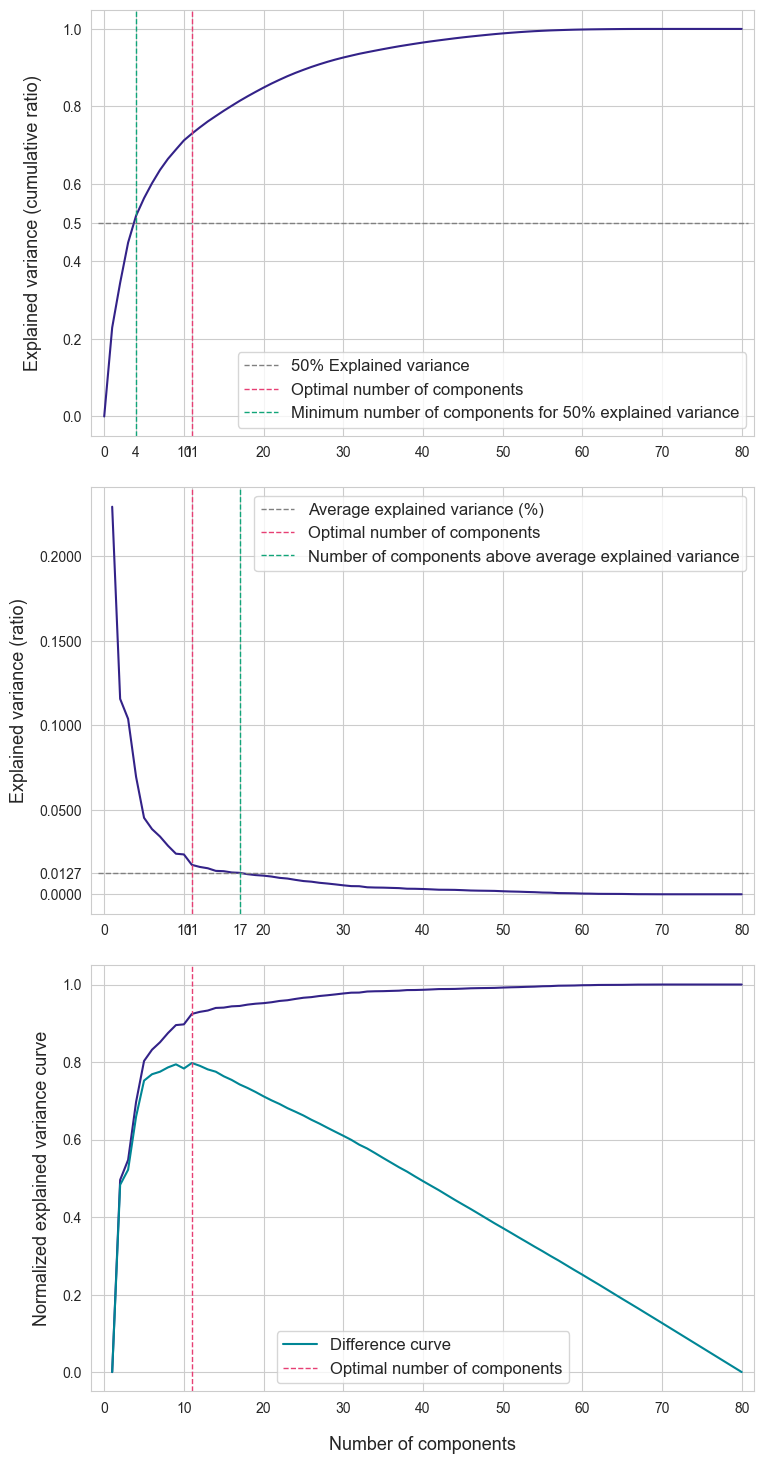

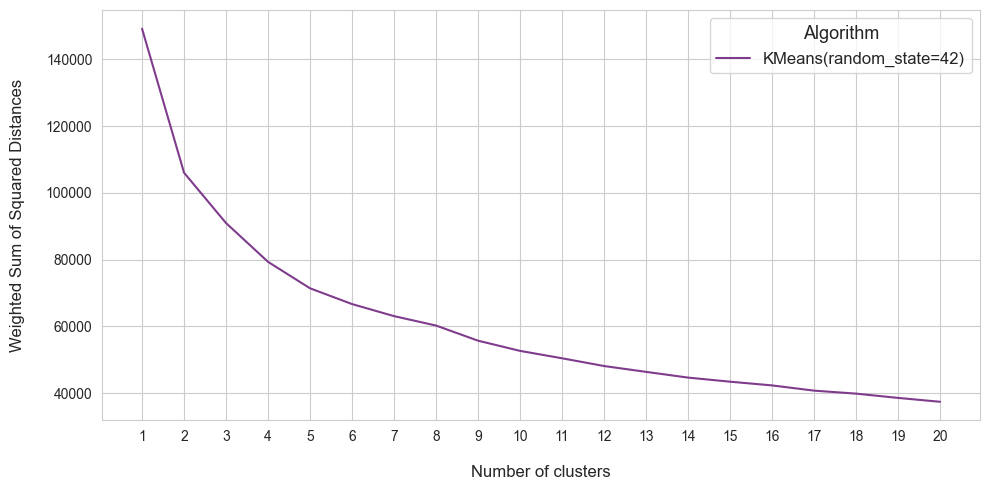

In [33]:
#==================== Auto Encoder ==============================================
if DimensioreductionAE:
    # Set random seed for TensorFlow
    tf.random.set_seed(42)
    np.random.seed(42)
    
    input_img = Input(shape=(scaleddata.shape[1],))

    encoded = Dense(512, activation='tanh')(input_img)
    encoded = Dense(128, activation='tanh')(encoded)
    encoded = Dense(32, activation='tanh')(encoded)

    encoded = Dense(latentspace)(encoded) # Linear activation function at the bottleneck

    decoded = Dense(32, activation='tanh')(encoded)
    decoded = Dense(128, activation='tanh')(decoded)
    decoded = Dense(512, activation='tanh')(decoded)
    decoded = Dense(scaleddata.shape[1], activation = 'sigmoid')(decoded)
    autoencoder = Model(input_img, decoded)
    # autoencoder.summary()

    autoencoder.compile(optimizer = "adam", loss = "mse")
    X = x_train
    history = autoencoder.fit(X, X, batch_size = 128, epochs = 100, verbose = 1)
    encoder = Model(input_img, encoded)

    Choselabel = 'Hora'
    # Choselabel = 'UV DPI_PV_Sudeste-Centro-Oeste'  #Puedo cambiar el choselabel de acuerdo con las columnas del dataframe (datapd) para encontrar algun patron en el espacio reducido por el autonecoder. (Muy buena herramienta Visual)
    plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss']})
    plot_df.plot(logy=True, figsize=(15,5), fontsize=12)
    plt.xlabel('epoch', fontsize=12)
    plt.ylabel('loss', fontsize=12)
    plt.show()

    x_proj = encoder.predict(x_train)
    
    if showAutoEncoder:
        x_proj.shape
        proj = pd.DataFrame(x_proj)
        proj.columns = ["comp_1", "comp_2"]

        if Choselabel == 'Hora':
            label = datapd.reset_index()['Hora'].apply(categorize_patamar).values
        else:
            label = datapd.reset_index()[Choselabel].values

        fig = px.scatter(x=proj["comp_1"], y=proj["comp_2"], color=label, color_continuous_scale='rainbow')
        fig.update_layout(
            title="Autoencoder",
            xaxis_title="First comp",
            yaxis_title="Second comp",
            width=800,  # Width of the figure in pixels
            height=600,  # Height of the figure in pixels
        )
        fig.show()

import warnings
warnings.filterwarnings('ignore')
if DimensioreductionPCA:
    from clearn.dimensionality_reduction import DimensionalityReduction
    dr = DimensionalityReduction(datapd, num_vars=datapd.columns, cat_vars=None, num_algorithm='pca', cat_algorithm='mca', num_kwargs=None, cat_kwargs=None)
    dfPCA = dr.transform(n_components=None, min_explained_variance_ratio=None)
    dr.plot_num_explained_variance(thres=0.5, output_path=None, savefig_kws=None)
    
    reduced_data = dfPCA.values

    from clearn.clustering import Clustering
    cl = Clustering(dfPCA, normalize=False)
    dffc = cl.compute_clusters(n_clusters=None, metric='inertia', max_clusters=20, prefix=None, weights=None)
    cl.plot_score_comparison(output_path=None, savefig_kws=None)
    best = list(set(dffc))[-1]
    print(best)
    
elif DimensioreductionAE  == True:
    reduced_data = x_proj
else:
    reduced_data = x_train

2
For num_clusters = 2, The average silhouette_score is: 0.2984
Davies-Bouldin index: 1.4831
Calinski-Harabasz index: 1080.2521
3
For num_clusters = 3, The average silhouette_score is: 0.2275
Davies-Bouldin index: 1.6009
Calinski-Harabasz index: 849.2923
4
For num_clusters = 4, The average silhouette_score is: 0.2411
Davies-Bouldin index: 1.6120
Calinski-Harabasz index: 778.3132
5
For num_clusters = 5, The average silhouette_score is: 0.2353
Davies-Bouldin index: 1.5450
Calinski-Harabasz index: 721.7932
6
For num_clusters = 6, The average silhouette_score is: 0.2456
Davies-Bouldin index: 1.4669
Calinski-Harabasz index: 661.1921
8
For num_clusters = 8, The average silhouette_score is: 0.2386
Davies-Bouldin index: 1.4337
Calinski-Harabasz index: 585.9227
10
For num_clusters = 10, The average silhouette_score is: 0.2428
Davies-Bouldin index: 1.5121
Calinski-Harabasz index: 540.6763
11
For num_clusters = 11, The average silhouette_score is: 0.2395
Davies-Bouldin index: 1.5513
Calinski-Hara

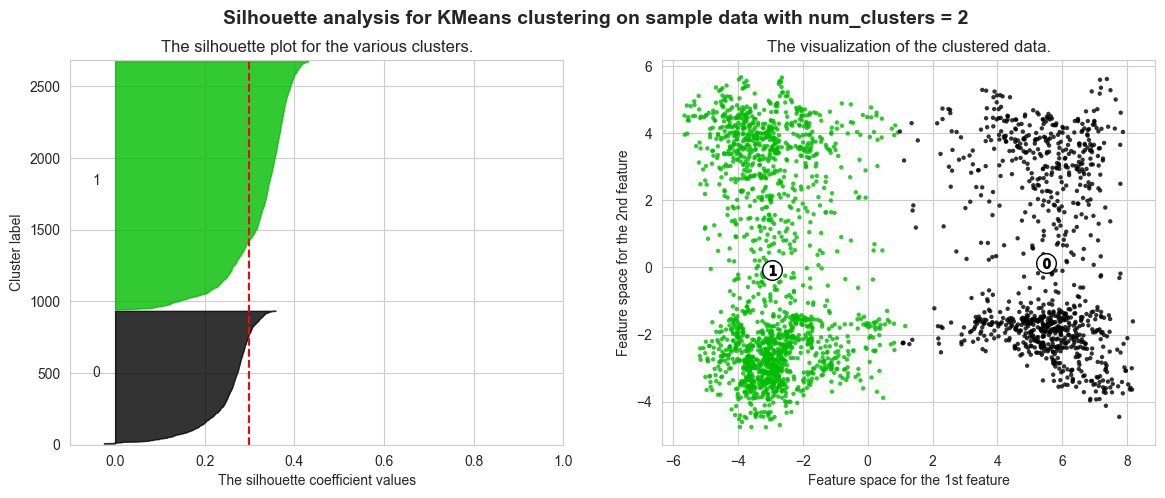

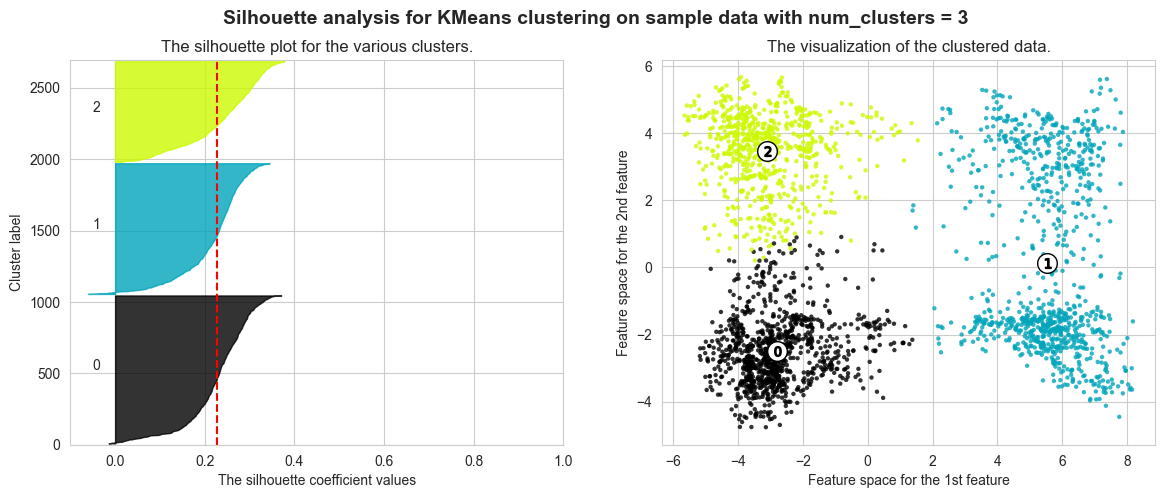

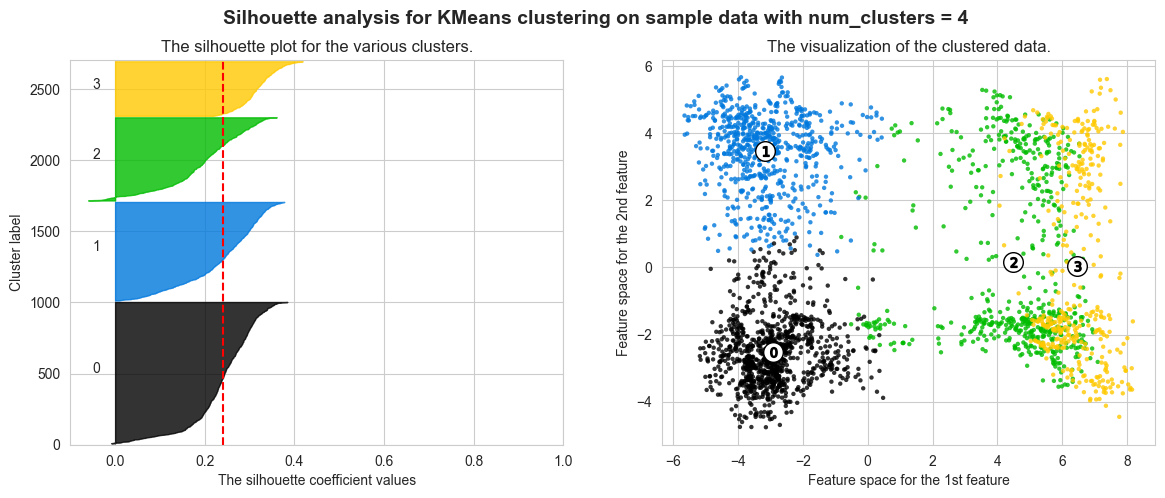

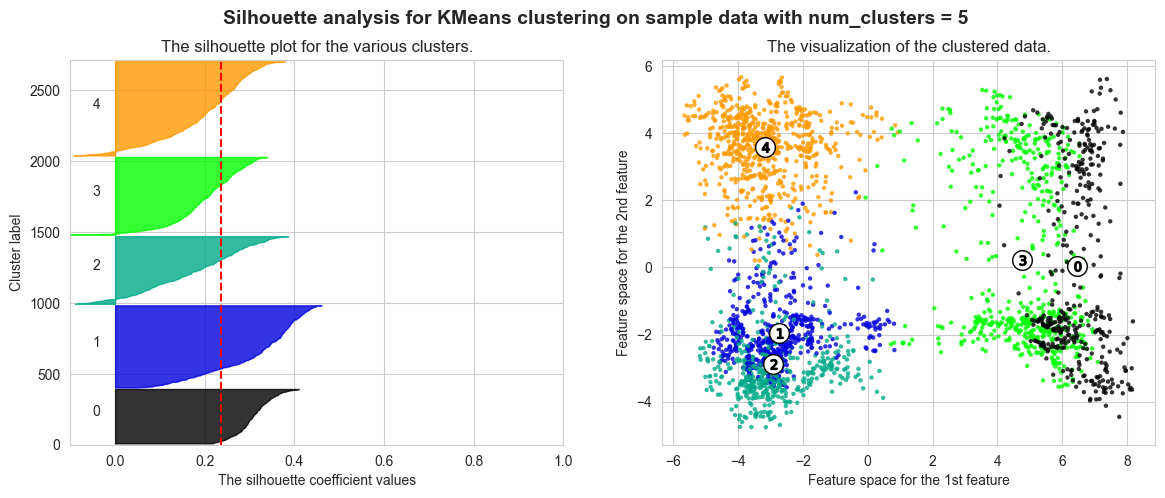

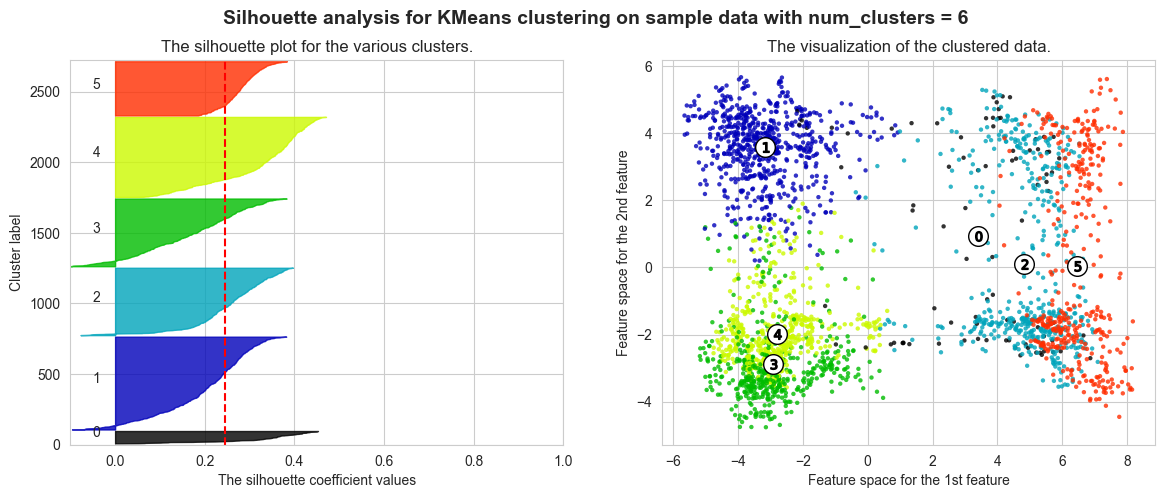

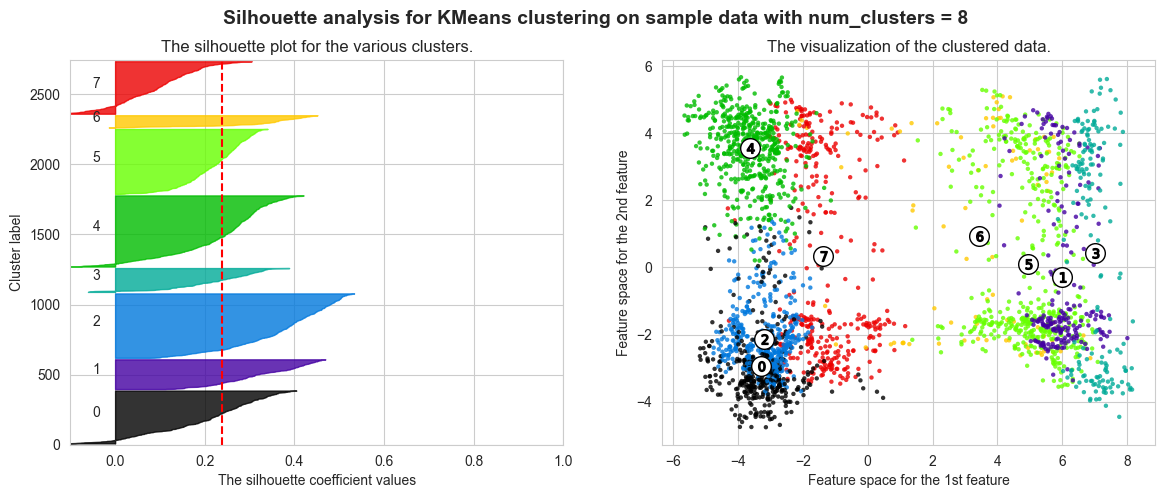

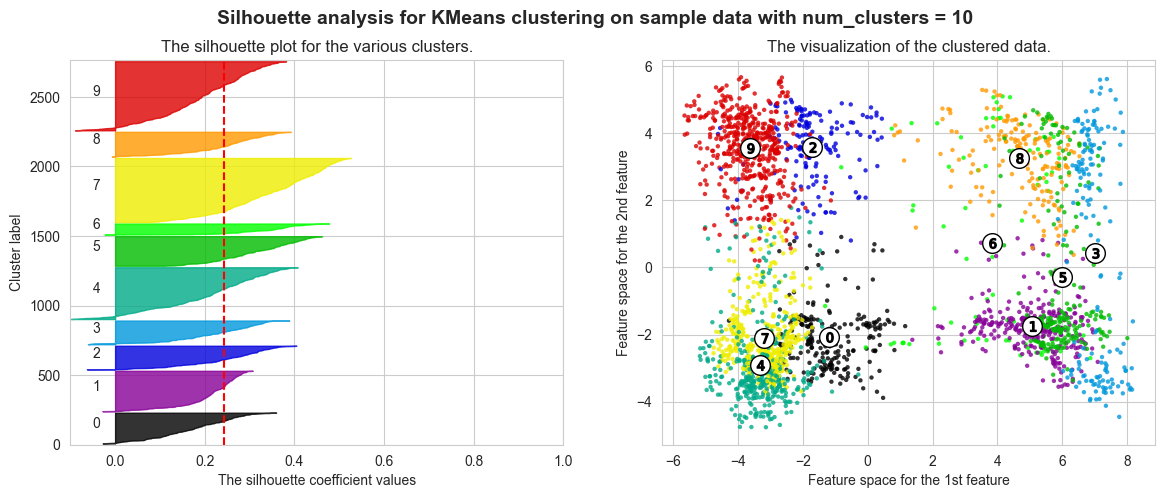

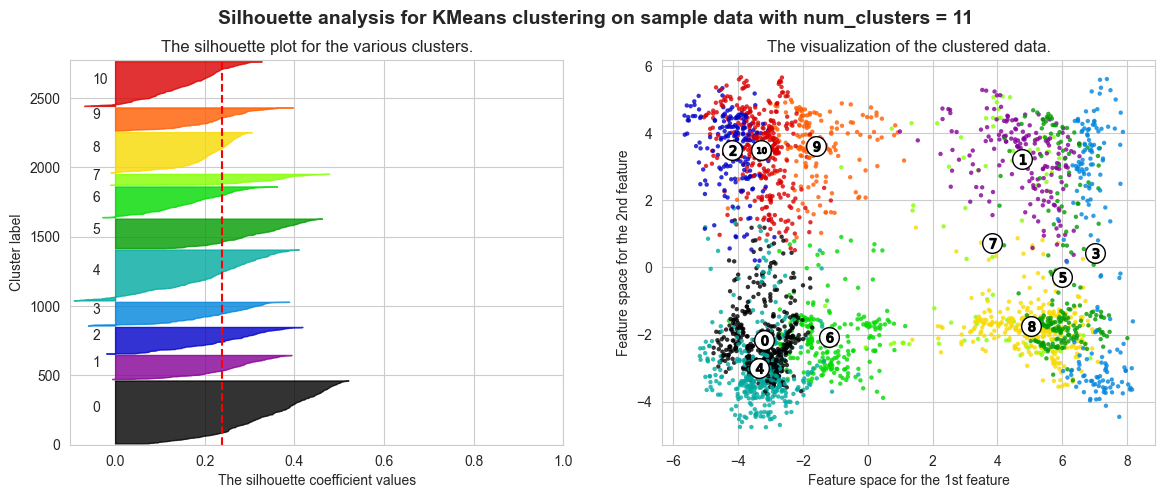

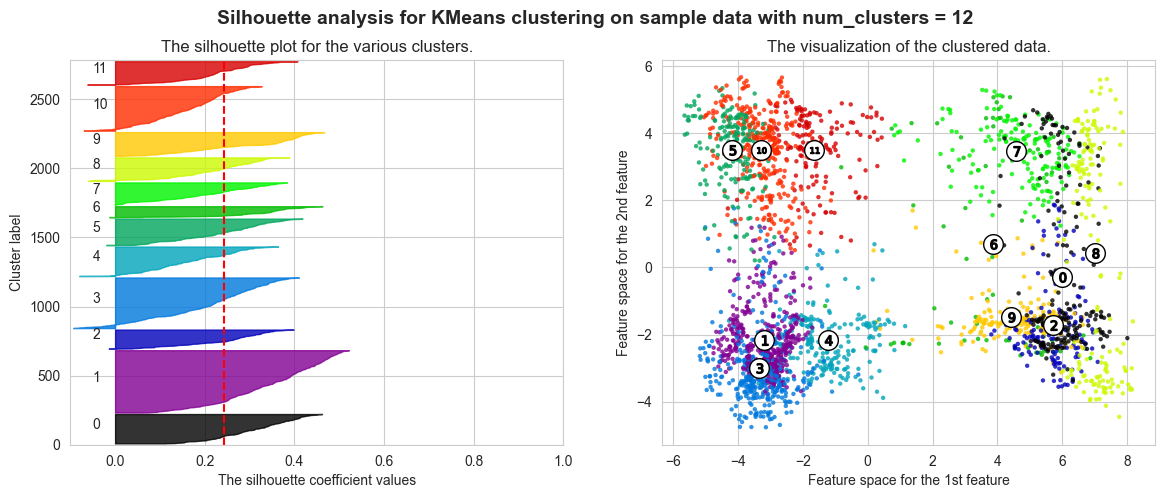

In [34]:
clusters = kmeans_clustering(
    reduced_data,
    num_clusters_list=[2, 3, 4, 5, 6, 8, 10, 11, 12],
    clusters_dbscan=False,
    clusters_hc=False,
    clusters_sc=False,
    tsne=False,
    param_dbscan=[0.5, 500]
)

# Avaliação de Clusters

In [35]:
Cluster = clusters[4]
Clustersdf = pd.DataFrame(Cluster, index=datapd.index, columns = ['Cluster'])
Clustersdf['Cluster'] = Clustersdf['Cluster'].astype(str)
print(set(Cluster))
ClusterEvaluation = True
columns2 = ['PG_UHE', 'PG_UTE', 'PG_EOL', 'PG_SOL', 'PG_BIO', 'PL_MW', 'PG_MW','OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV','PI_mva', 'PFI']
# columns2 = ['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV','PI_mva', 'PFI']
# columns2 = []
datapd2 = flatdataframe(dfanalise, cenario, region, columns2, ACDCflux = True, Reserva=False, DPI=False, IndiceGroup=True, InfoPO=True, PImva_reg_nt=False, PImva=True, Busfeatures=False,Vanalysis='UV')
datapd2.shape

{0, 1, 2, 3, 4, 5}


(2656, 97)

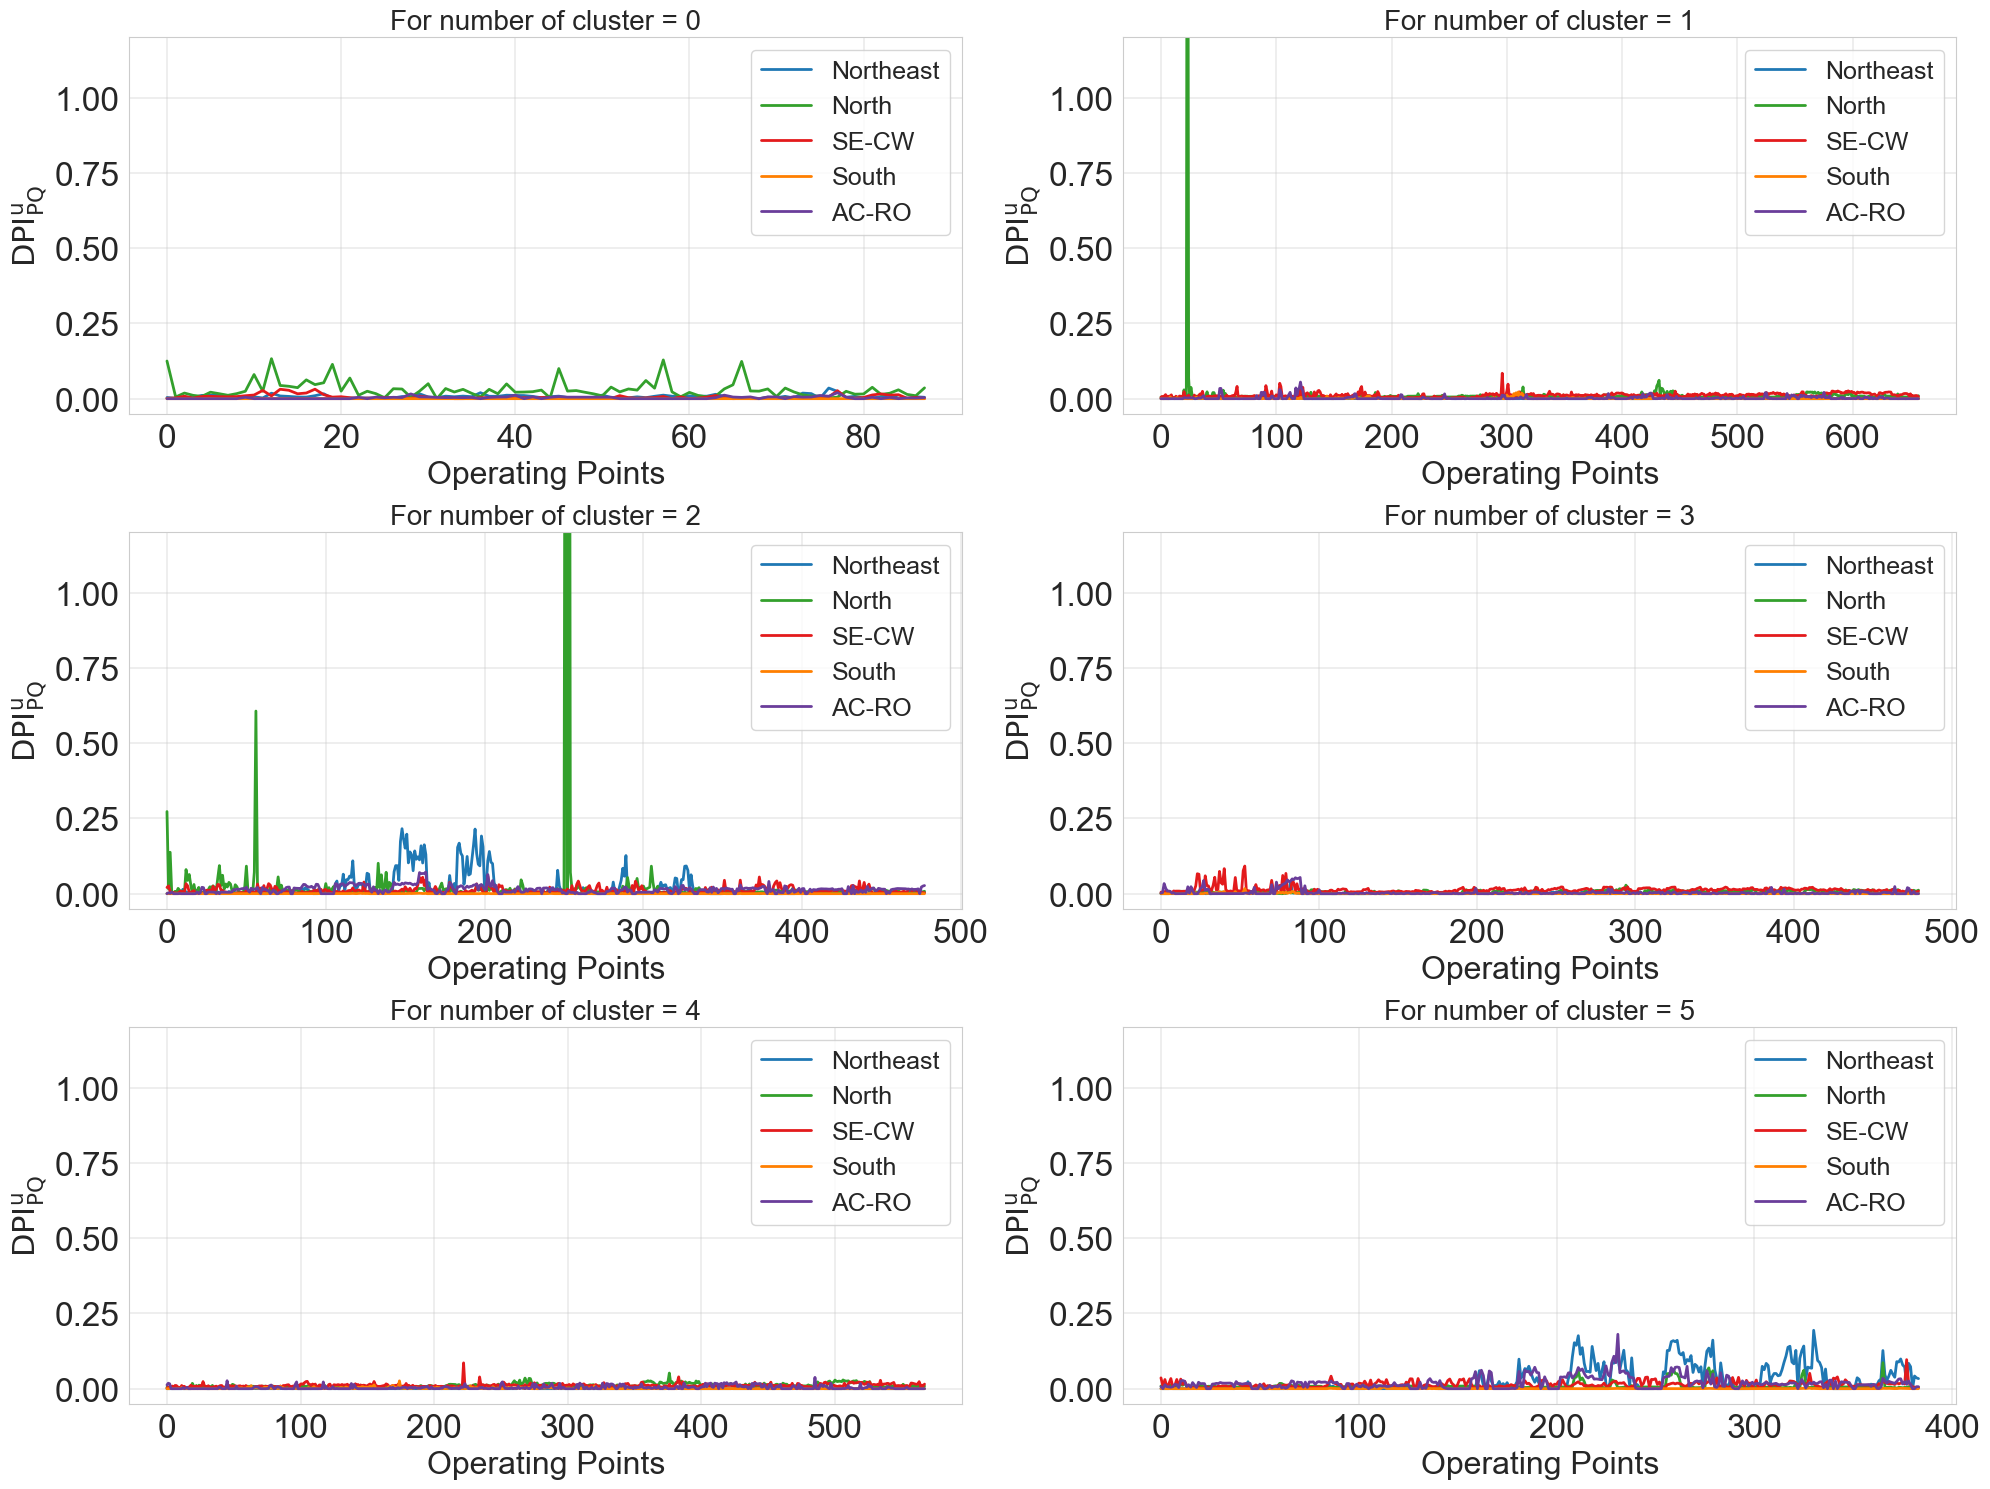

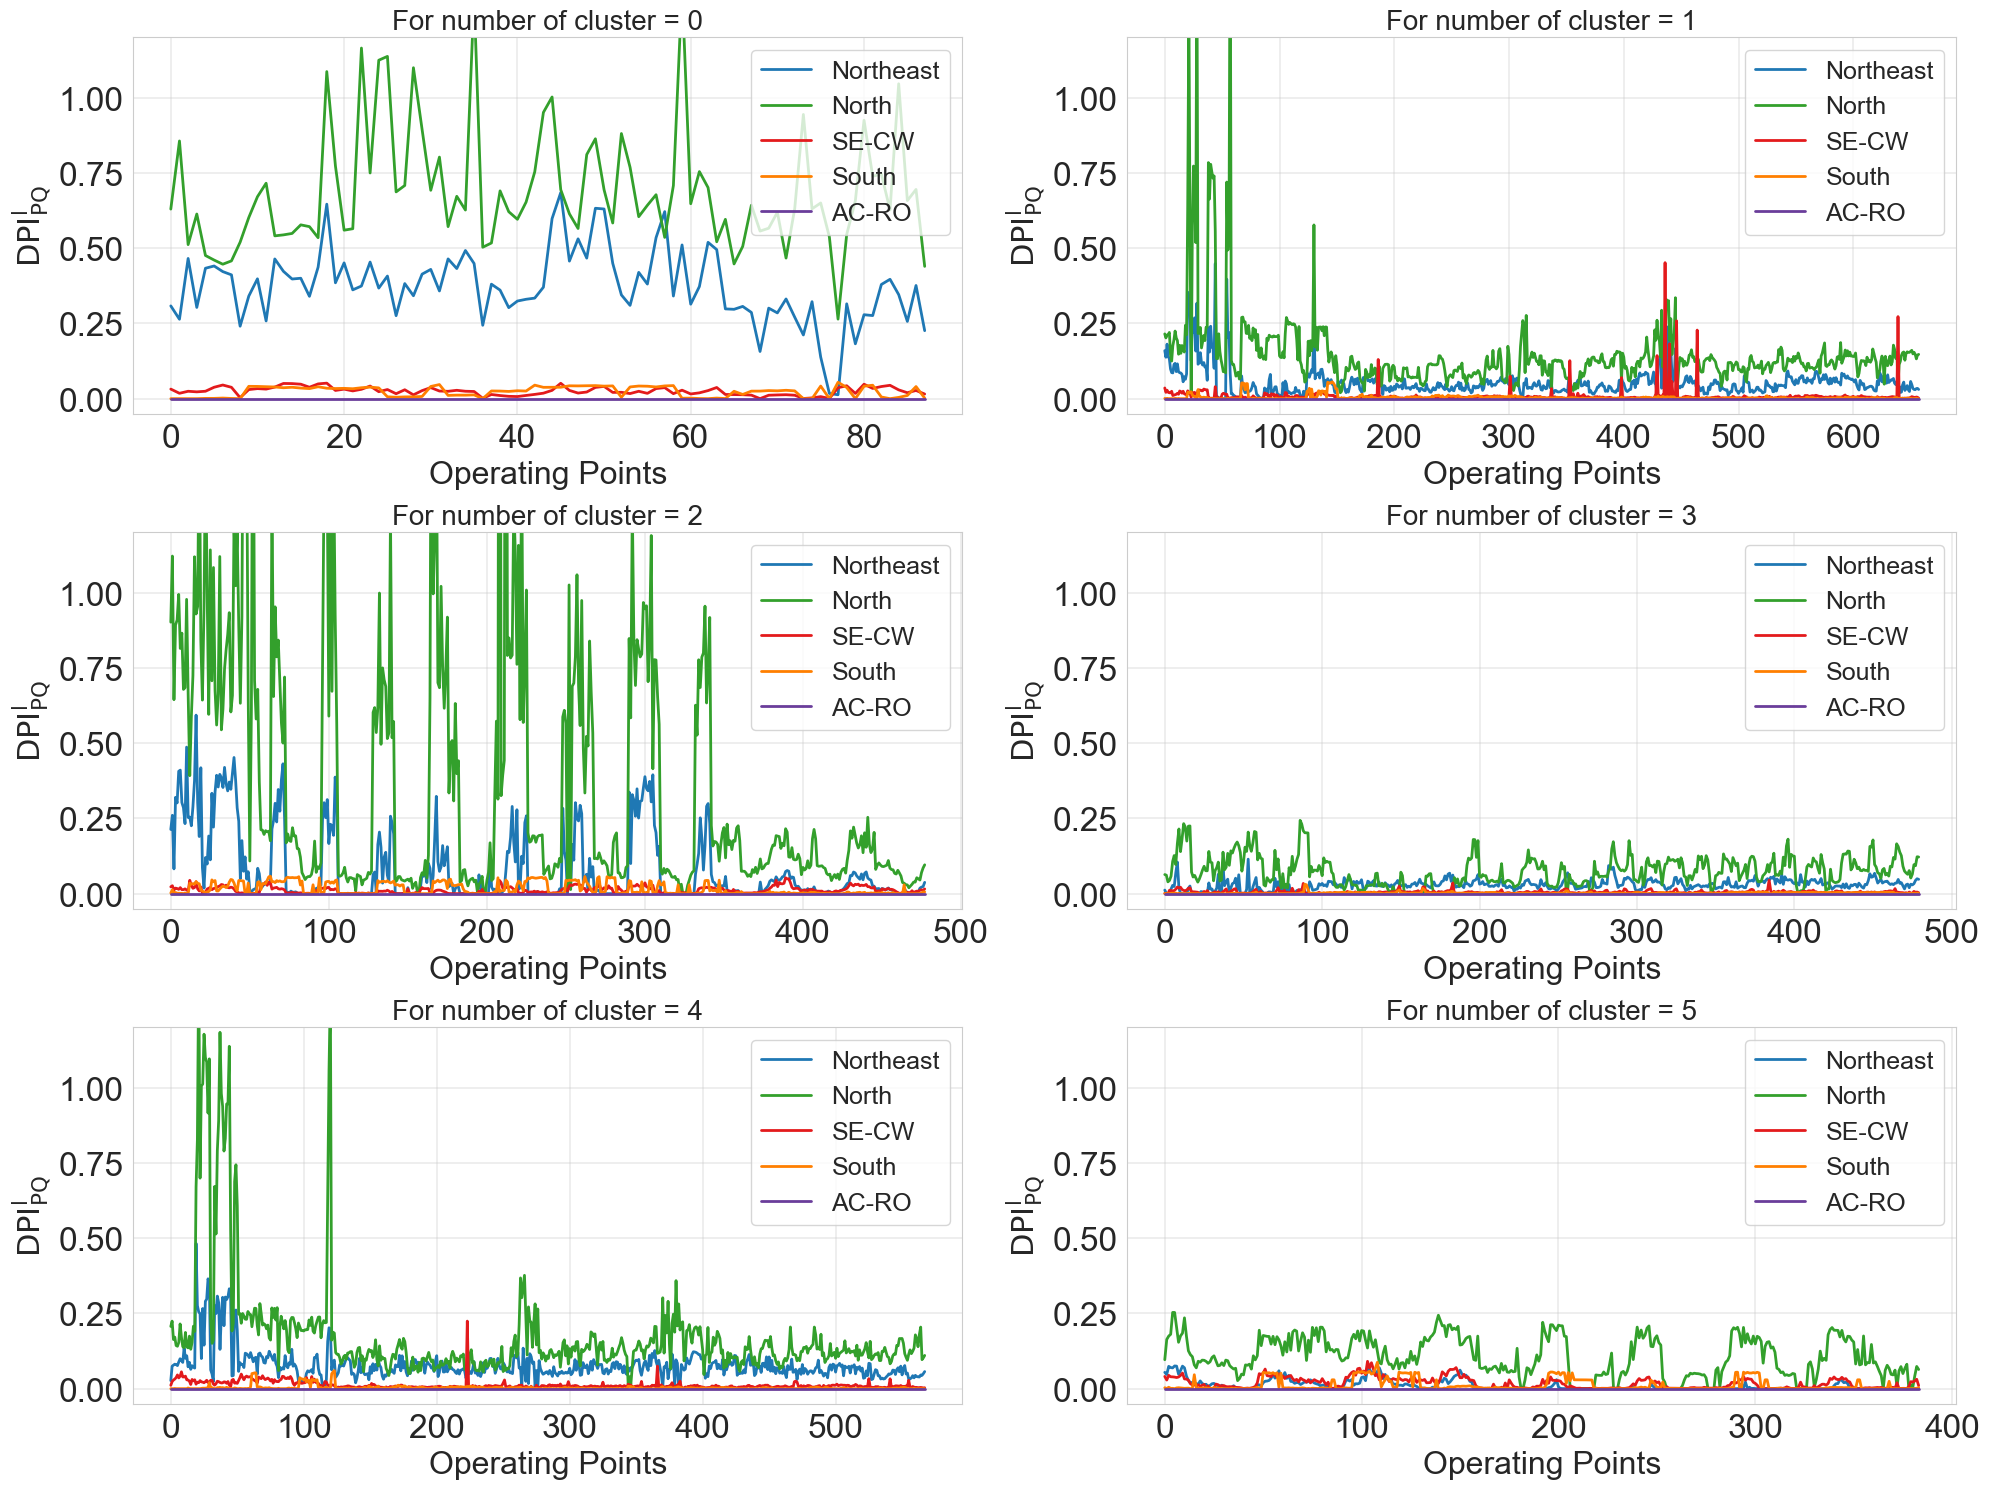

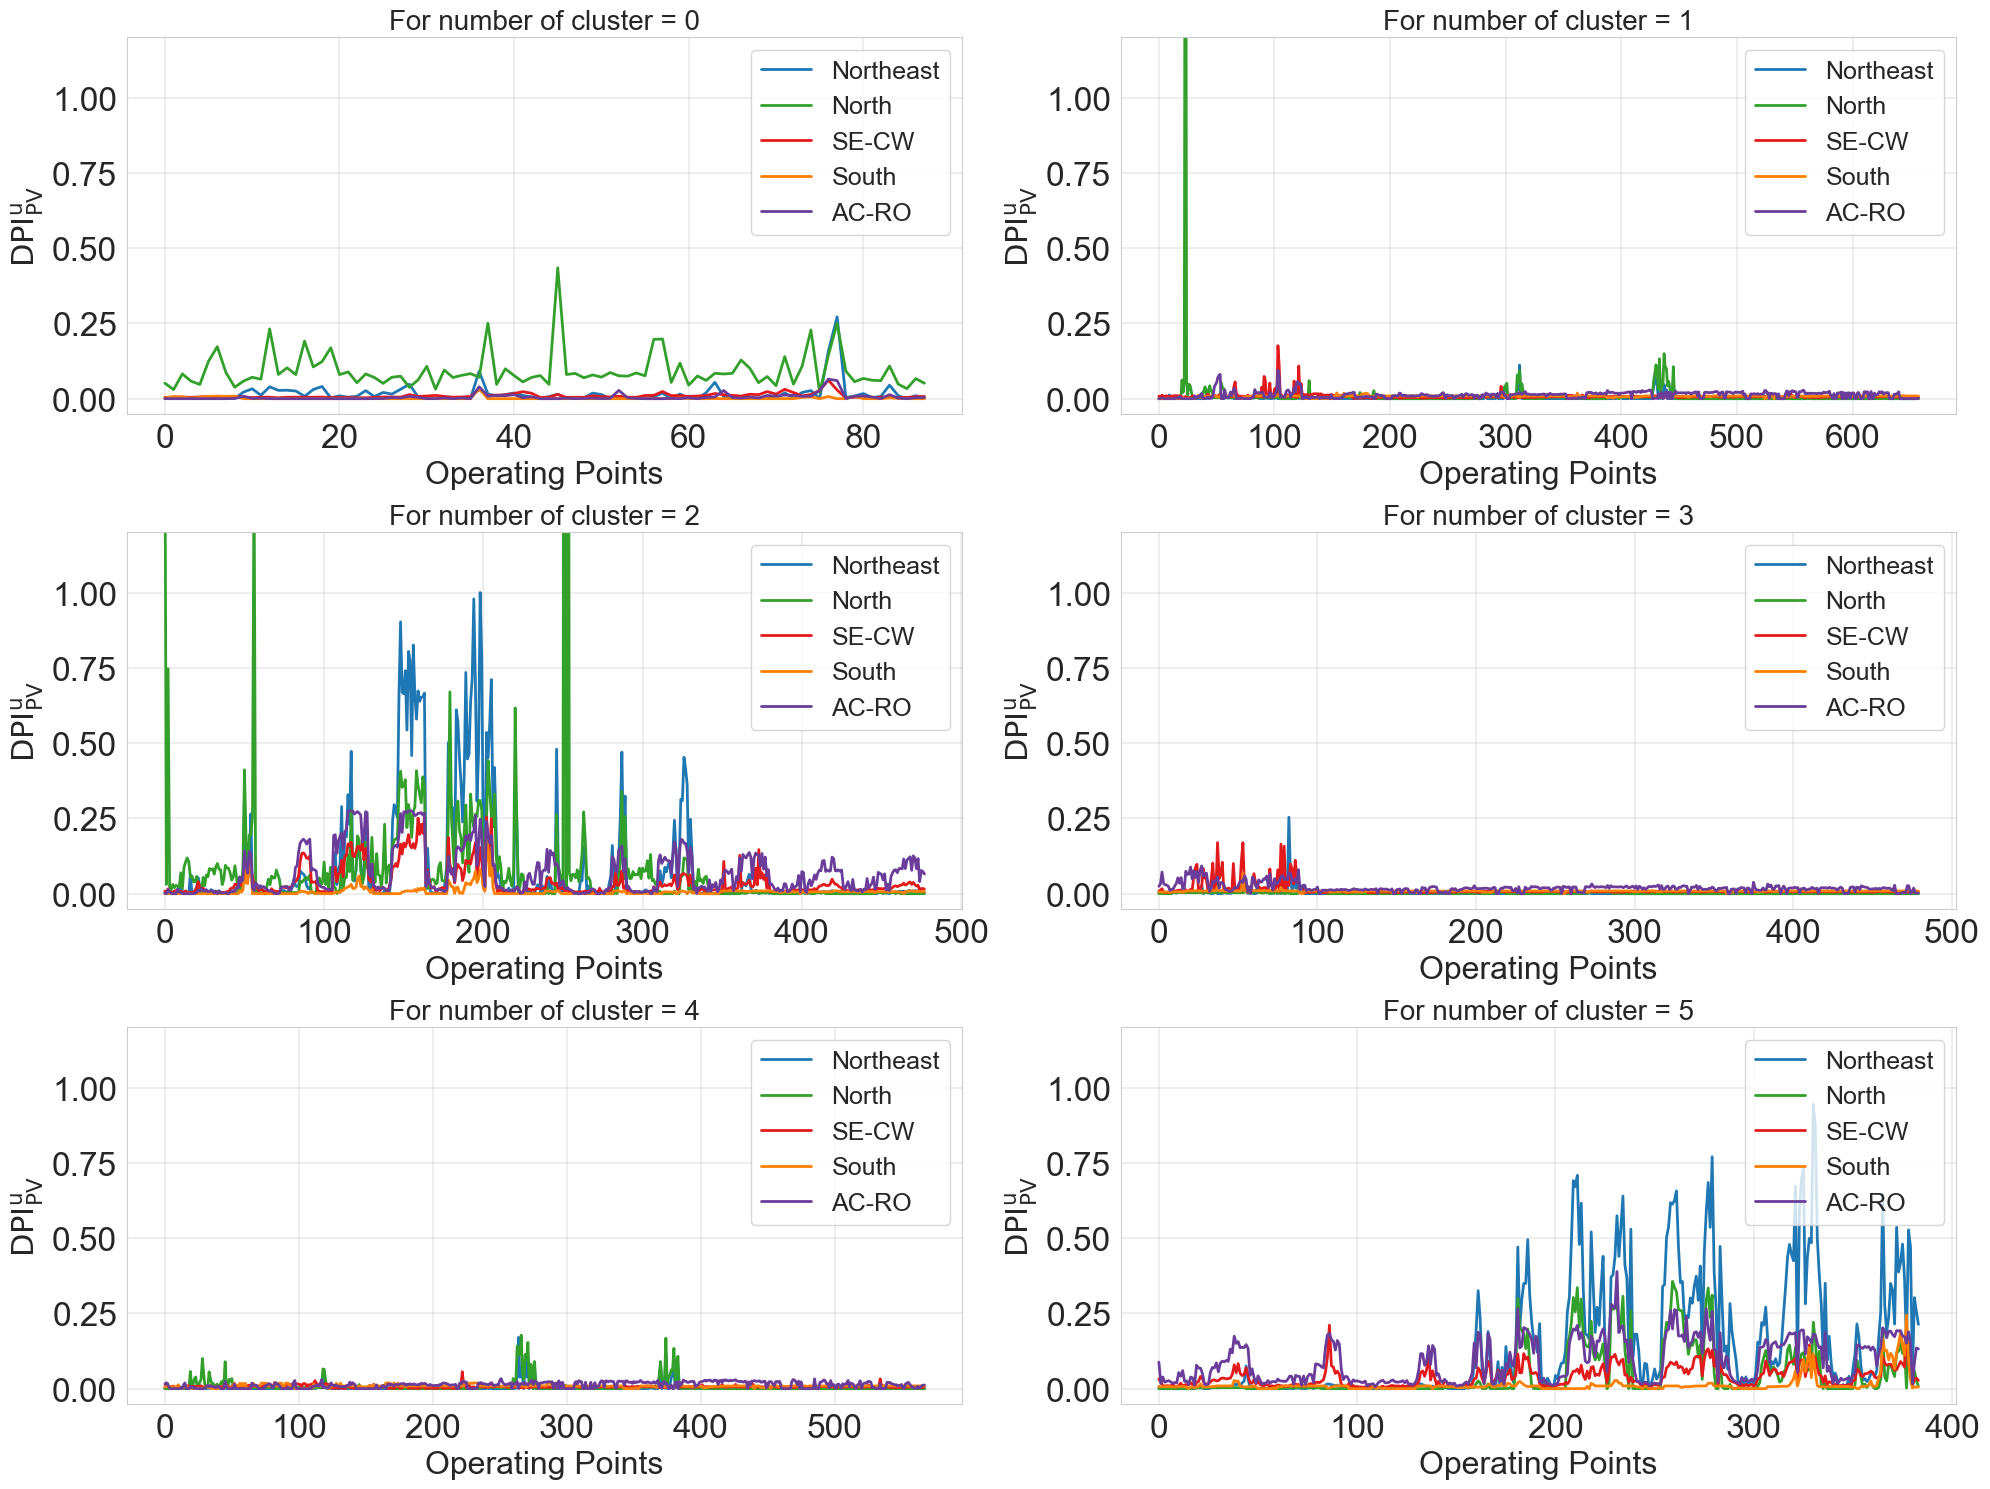

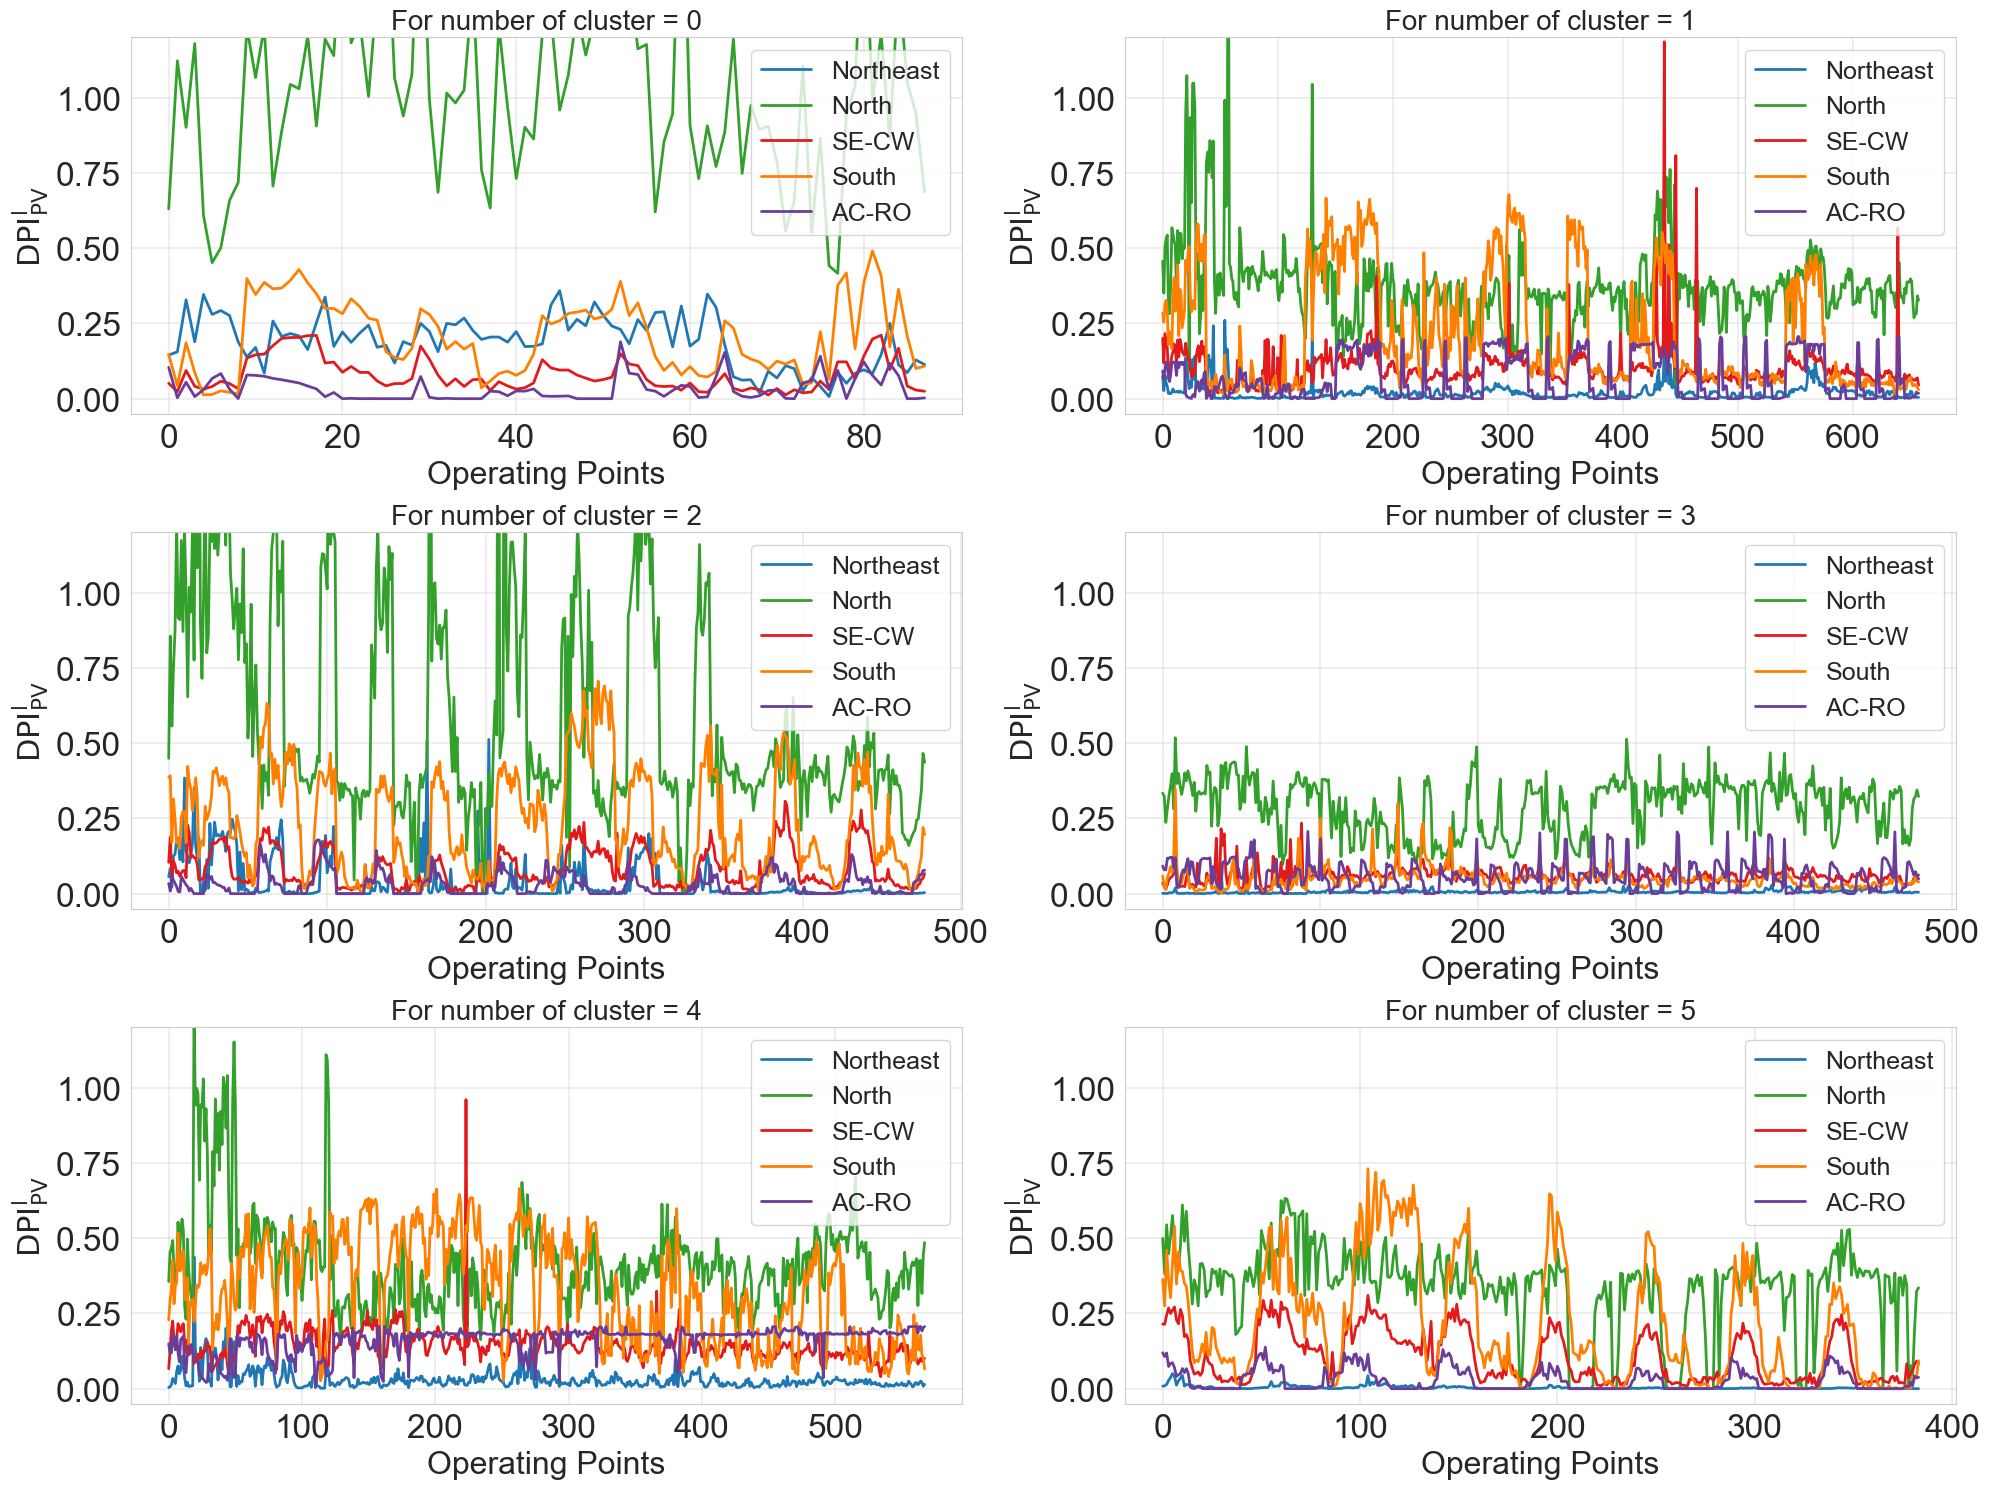

In [36]:
# ========================= Analise do DPI nos diferentes clusters ===============================
if region != 'PO':
    df = dfanalise
    if cenario == 'all':
        df_indice_cluster = df[['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV']].reset_index().merge(Clustersdf, on = ['Dia','Hora', 'Cenario'], how = 'left') # descomentar para analis de todos os cenarios
        df_indice_cluster = df_indice_cluster.set_index(['Dia','Hora','REG','Cenario'])# descomentar para analis de todos os cenarios
    else:
        if type(cenario) == list:
            df_indice_cluster = df.loc[:,:,:, cenario][['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV']].reset_index().merge(Clustersdf, on = ['Dia','Hora','Cenario'], how = 'left')
            df_indice_cluster = df_indice_cluster.set_index(['Dia','Hora','REG','Cenario'])
        else:
            df_indice_cluster = df.loc[:,:,:, cenario][['OV DPI_PQ', 'UV DPI_PQ', 'OV DPI_PV', 'UV DPI_PV']].reset_index().merge(Clustersdf, on = ['Dia','Hora'], how = 'left')
            df_indice_cluster = df_indice_cluster.set_index(['Dia','Hora','REG'])

    if region != 'all':
        df_indice_cluster = df_indice_cluster.loc[:,:,region]
    # =============================================================================================
    num_clusters = df_indice_cluster['Cluster'].unique().size
    rows = int(np.ceil(np.sqrt(num_clusters)))
    cols = int(np.ceil(num_clusters / rows))

    indicedic = {'DPI_(u)_PQ':['OV DPI_PQ',r'$\mathrm{DPI}_\mathrm{PQ}^\mathrm{u}$'],
                'DPI_(l)_PQ': ['UV DPI_PQ',r'$\mathrm{DPI}_\mathrm{PQ}^\mathrm{l}$'],
                'DPI_(u)_PV':['OV DPI_PV',r'$\mathrm{DPI}_\mathrm{PV}^\mathrm{u}$'],
                'DPI_(l)_PV': ['UV DPI_PV', r'$\mathrm{DPI}_\mathrm{PV}^\mathrm{l}$']}

    # =============================================================================================
    if region != 'all':
        fig, axs = plt.subplots(rows, cols, figsize=(15, 10))
        # Iterate through clusters and create plots
        for i, ax in enumerate(axs.flat):
            if i >= num_clusters:
                # If there are more subplots than clusters, turn off extra ones
                ax.axis('off')
                continue

            Condition = df_indice_cluster['Cluster']==str(i)
            plot_indice_dec(df_indice_cluster[Condition], '', 'indices', order=False, ylimites=[-0.05, 1.2],  ax=ax)
            ax.set_title(f'For number of cluster = {i}', fontsize=20)
        plt.show()
    else:
        # =============================================================================================
        for indices in indicedic.keys():
            fig, axs = plt.subplots(rows, cols, figsize=(20, 15))
            # Iterate through clusters and create plots
            for i, ax in enumerate(axs.flat):
                if i >= num_clusters:
                    # If there are more subplots than clusters, turn off extra ones
                    ax.axis('off')
                    continue

                Condition = df_indice_cluster['Cluster']==str(i)
                plot_indice_reg(df_indice_cluster[Condition], indicedic[indices][1], indices, '', indicedic[indices][0], order=False, ylimites=[-0.05, 1.2],  ax=ax)
                ax.set_title(f'For number of cluster = {i}', fontsize=20)
            plt.show()

In [37]:
# Initialize 'PL_Total' column to zeros
datapd2['PG_UHE_Total'] = 0
datapd2['PG_UTE_Total'] = 0
datapd2['PG_EOL_Total'] = 0
datapd2['PG_SOL_Total'] = 0
datapd2['PG_BIO_Total'] = 0
for col in datapd2.columns:
    if col.startswith('PG_UHE_') & ~col.endswith('_Total'):
        datapd2['PG_UHE_Total'] += datapd2[col]
    elif col.startswith('PG_UTE_') & ~col.endswith('_Total'):
        datapd2['PG_UTE_Total'] += datapd2[col]
    elif col.startswith('PG_EOL_') & ~col.endswith('_Total'):
        datapd2['PG_EOL_Total'] += datapd2[col]
    elif col.startswith('PG_SOL_') & ~col.endswith('_Total'):
        datapd2['PG_SOL_Total'] += datapd2[col]
    elif col.startswith('PG_BIO_') & ~col.endswith('_Total'):
        datapd2['PG_BIO_Total'] += datapd2[col]

if cenario == 'all':
    df = datapd2.merge(Clustersdf, on = ['Dia','Hora', 'Cenario'], how = 'left') # descomentar para analis de todos os cenarios
else:
    if type(cenario) == list:
        df = datapd2.merge(Clustersdf, on = ['Dia','Hora','Cenario'], how = 'left')
    else:
        df = datapd2.merge(Clustersdf, on = ['Dia','Hora',], how = 'left')

In [38]:
df.columns

Index(['PG_UHE_AC-RO', 'PG_UTE_AC-RO', 'PG_EOL_AC-RO', 'PG_SOL_AC-RO',
       'PG_BIO_AC-RO', 'PL_MW_AC-RO', 'PG_MW_AC-RO', 'OV DPI_PQ_AC-RO',
       'UV DPI_PQ_AC-RO', 'OV DPI_PV_AC-RO',
       ...
       'Itaipu_60_MW', 'Itaipu_60_MVAR', 'I_Solt_MW', 'I_Solt_MVAR',
       'PG_UHE_Total', 'PG_UTE_Total', 'PG_EOL_Total', 'PG_SOL_Total',
       'PG_BIO_Total', 'Cluster'],
      dtype='object', length=103)

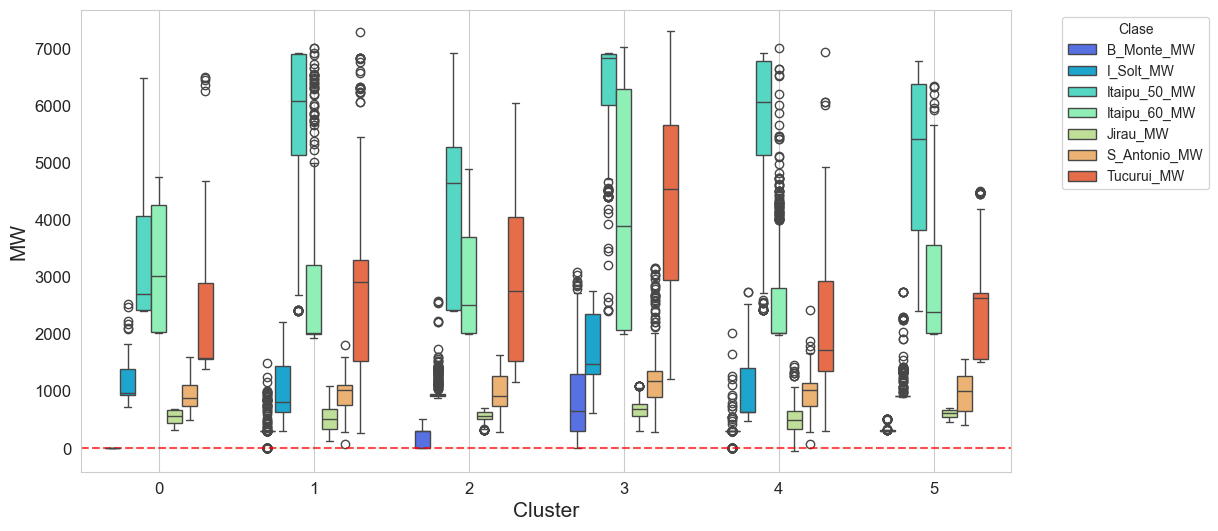

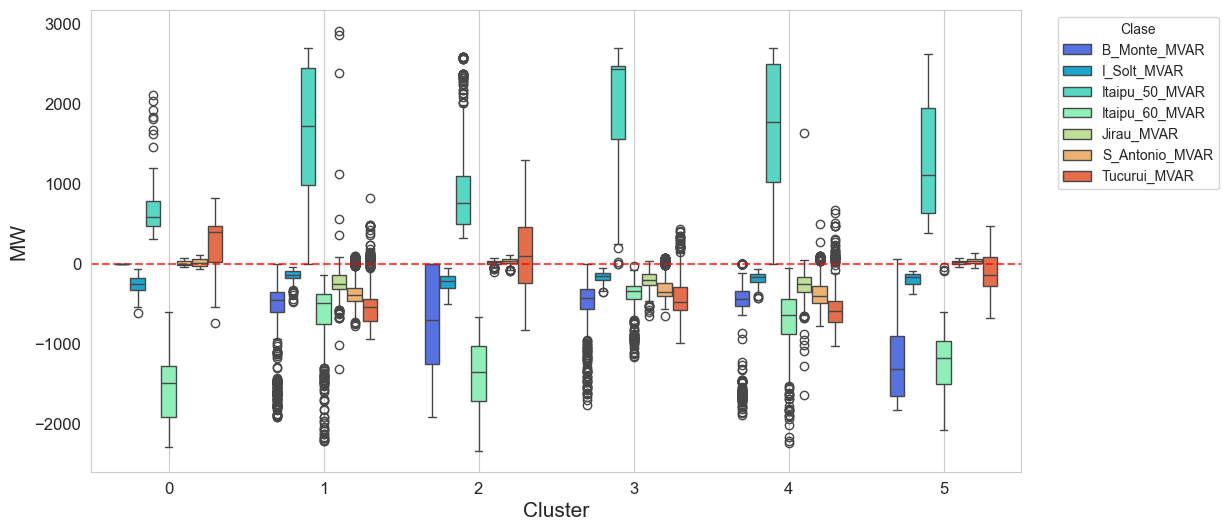

In [39]:
if ClusterEvaluation:
    dff = pd.melt(df[['Jirau_MW',  'S_Antonio_MW', 'Tucurui_MW',  'B_Monte_MW',  'Itaipu_50_MW',  'Itaipu_60_MW',  'I_Solt_MW', 'Cluster']], id_vars=['Cluster'], value_vars=['Jirau_MW',  'S_Antonio_MW', 'Tucurui_MW',  'B_Monte_MW',  'Itaipu_50_MW',  'Itaipu_60_MW',  'I_Solt_MW'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None, legendPos=True)

    dff = pd.melt(df[[ 'Jirau_MVAR', 'S_Antonio_MVAR',  'Tucurui_MVAR',  'B_Monte_MVAR',  'Itaipu_50_MVAR',  'Itaipu_60_MVAR', 'I_Solt_MVAR','Cluster']], id_vars=['Cluster'], value_vars=['Jirau_MVAR', 'S_Antonio_MVAR',  'Tucurui_MVAR',  'B_Monte_MVAR',  'Itaipu_50_MVAR',  'Itaipu_60_MVAR', 'I_Solt_MVAR'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None, legendPos=True)


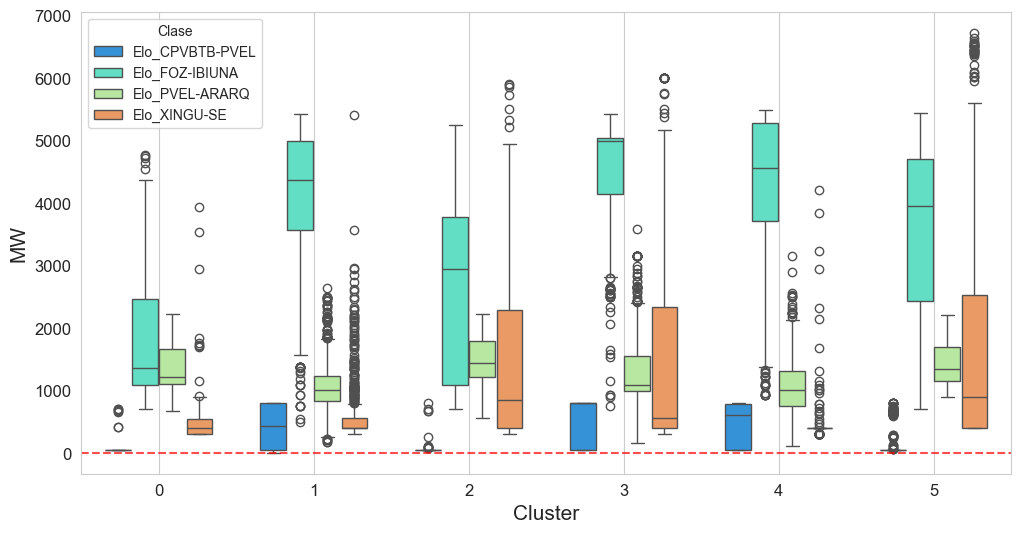

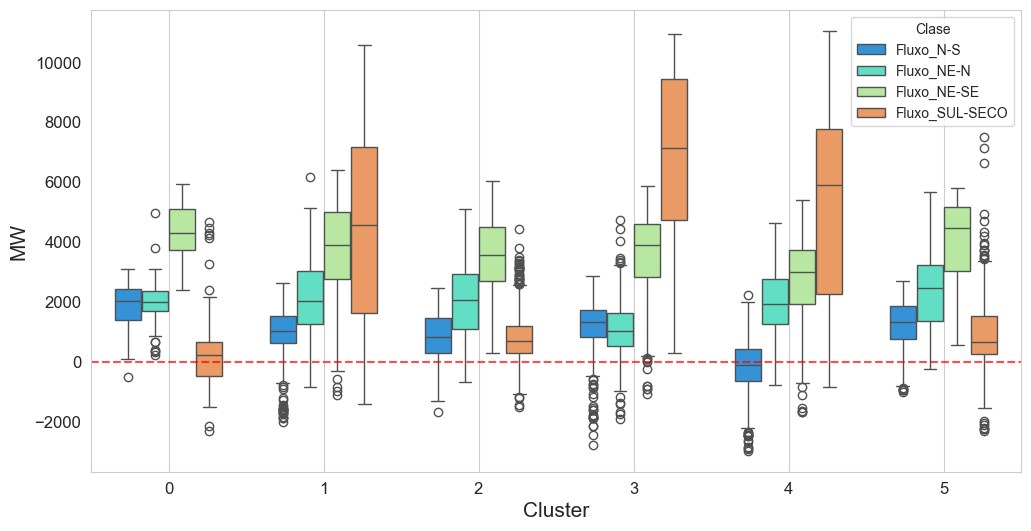

In [40]:
if ClusterEvaluation:
    dff = pd.melt(df[['Elo_FOZ-IBIUNA', 'Elo_PVEL-ARARQ', 'Elo_XINGU-SE','Elo_CPVBTB-PVEL','Cluster']], id_vars=['Cluster'], value_vars=['Elo_FOZ-IBIUNA', 'Elo_PVEL-ARARQ', 'Elo_XINGU-SE','Elo_CPVBTB-PVEL'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None)
    dff = pd.melt(df[['Fluxo_N-S', 'Fluxo_NE-N', 'Fluxo_NE-SE', 'Fluxo_SUL-SECO','Cluster']], id_vars=['Cluster'], value_vars=['Fluxo_N-S', 'Fluxo_NE-N', 'Fluxo_NE-SE', 'Fluxo_SUL-SECO',], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None)

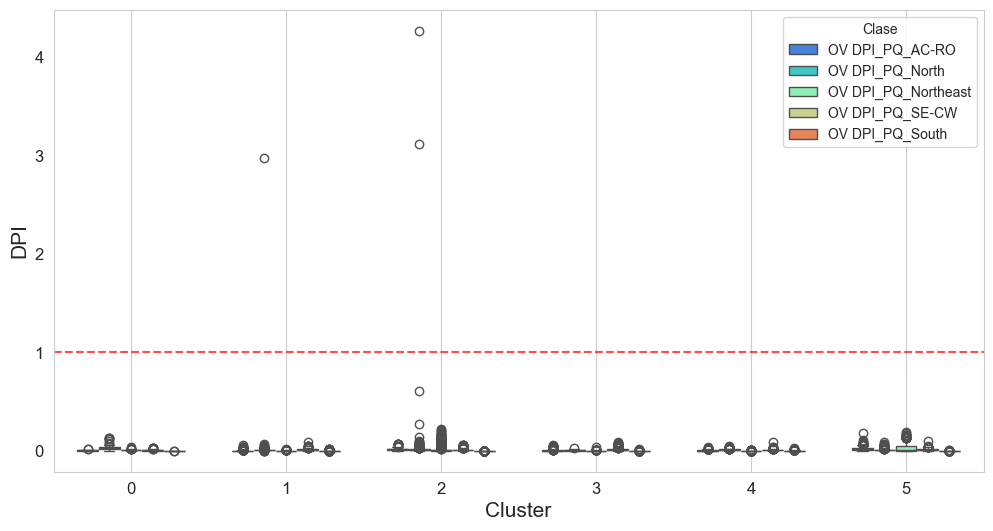

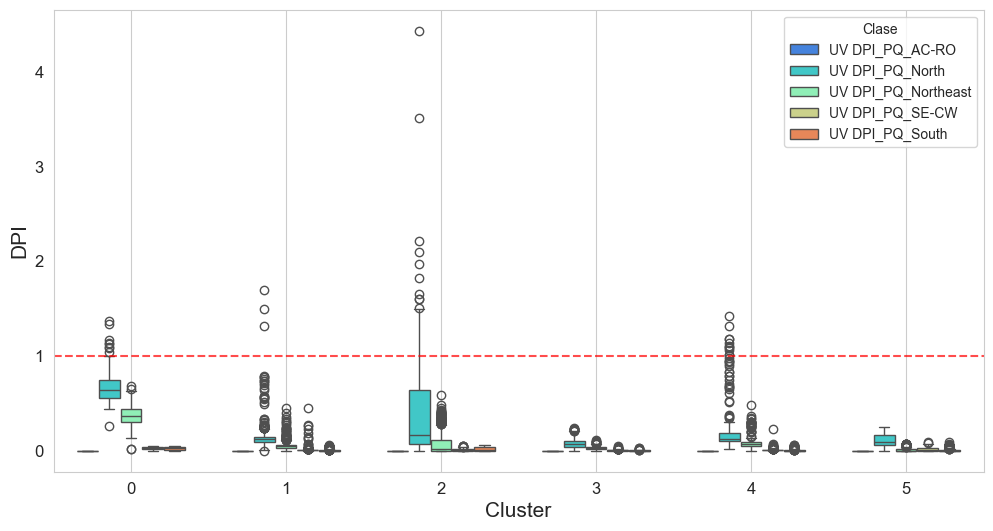

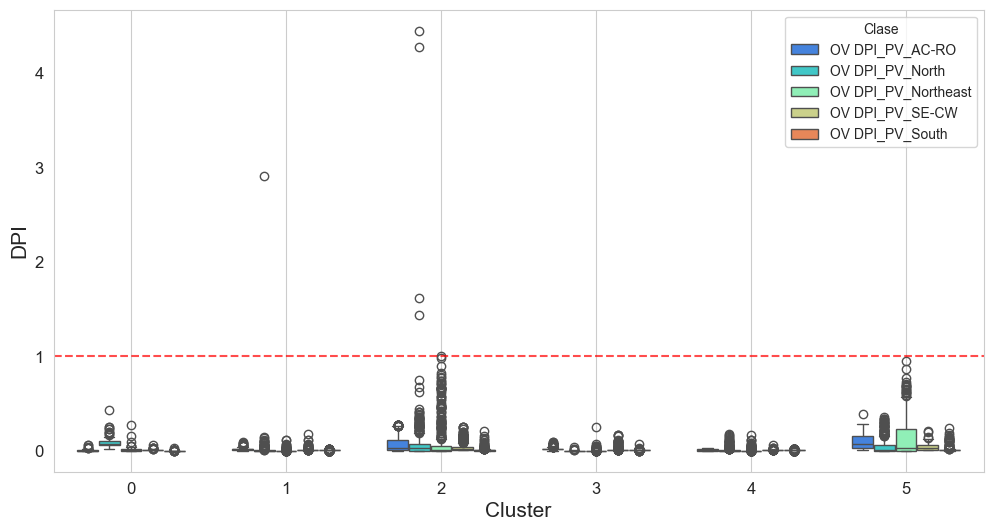

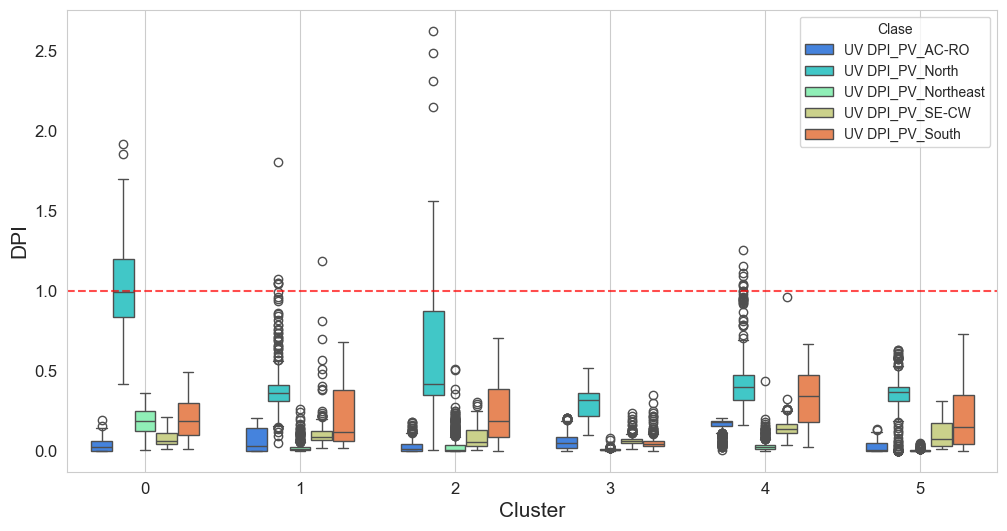

In [50]:
if ClusterEvaluation:
    dff = pd.melt(df[['OV DPI_PQ_AC-RO','OV DPI_PQ_Northeast', 'OV DPI_PQ_North', 'OV DPI_PQ_SE-CW', 'OV DPI_PQ_South','Cluster']], id_vars=['Cluster'], value_vars=['OV DPI_PQ_AC-RO','OV DPI_PQ_Northeast', 'OV DPI_PQ_North', 'OV DPI_PQ_SE-CW', 'OV DPI_PQ_South'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

    dff = pd.melt(df[['UV DPI_PQ_AC-RO', 'UV DPI_PQ_Northeast', 'UV DPI_PQ_North', 'UV DPI_PQ_SE-CW', 'UV DPI_PQ_South','Cluster']], id_vars=['Cluster'], value_vars=['UV DPI_PQ_AC-RO', 'UV DPI_PQ_Northeast', 'UV DPI_PQ_North', 'UV DPI_PQ_SE-CW', 'UV DPI_PQ_South',], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

    dff = pd.melt(df[['OV DPI_PV_AC-RO', 'OV DPI_PV_Northeast', 'OV DPI_PV_North', 'OV DPI_PV_SE-CW','OV DPI_PV_South' ,'Cluster']], id_vars=['Cluster'], value_vars=['OV DPI_PV_AC-RO', 'OV DPI_PV_Northeast', 'OV DPI_PV_North', 'OV DPI_PV_SE-CW','OV DPI_PV_South'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

    dff = pd.melt(df[['UV DPI_PV_AC-RO', 'UV DPI_PV_Northeast', 'UV DPI_PV_North', 'UV DPI_PV_SE-CW', 'UV DPI_PV_South','Cluster']], id_vars=['Cluster'], value_vars=['UV DPI_PV_AC-RO', 'UV DPI_PV_Northeast', 'UV DPI_PV_North', 'UV DPI_PV_SE-CW', 'UV DPI_PV_South'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)


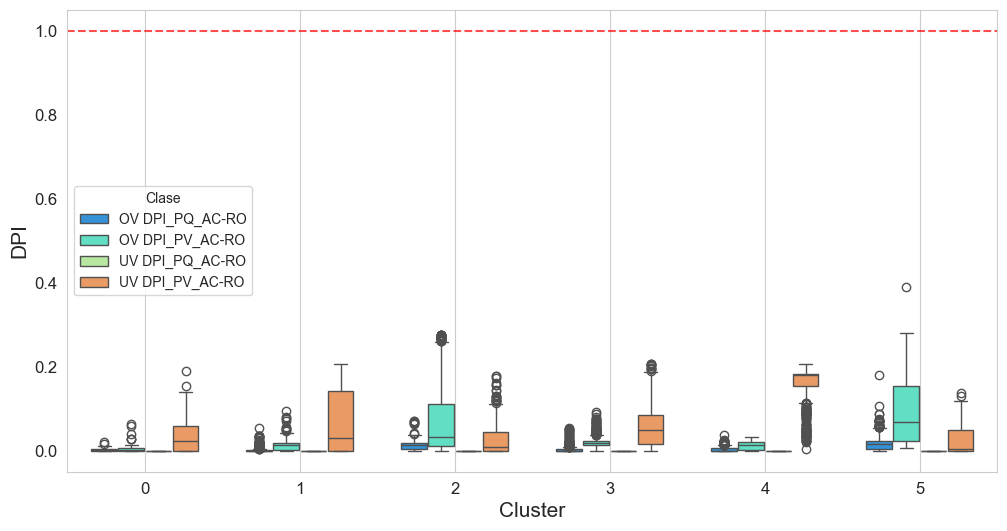

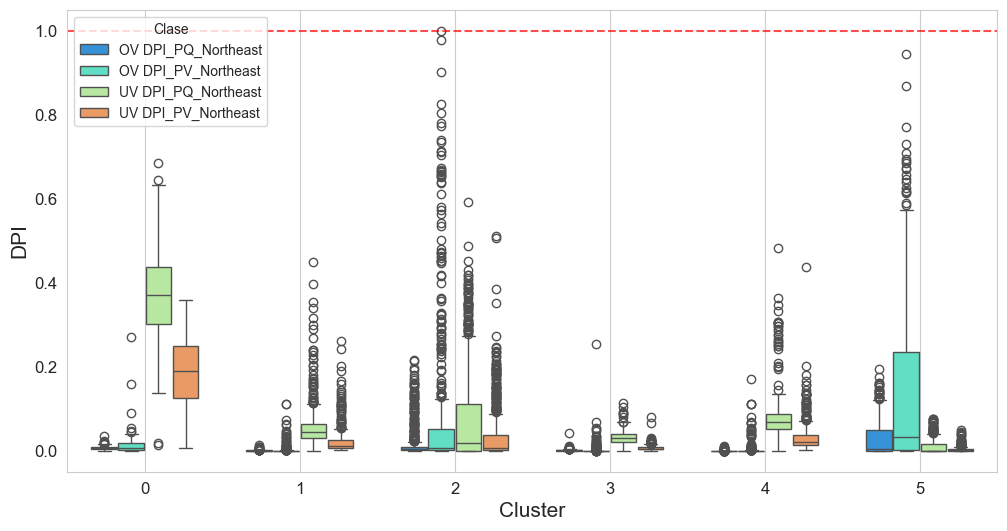

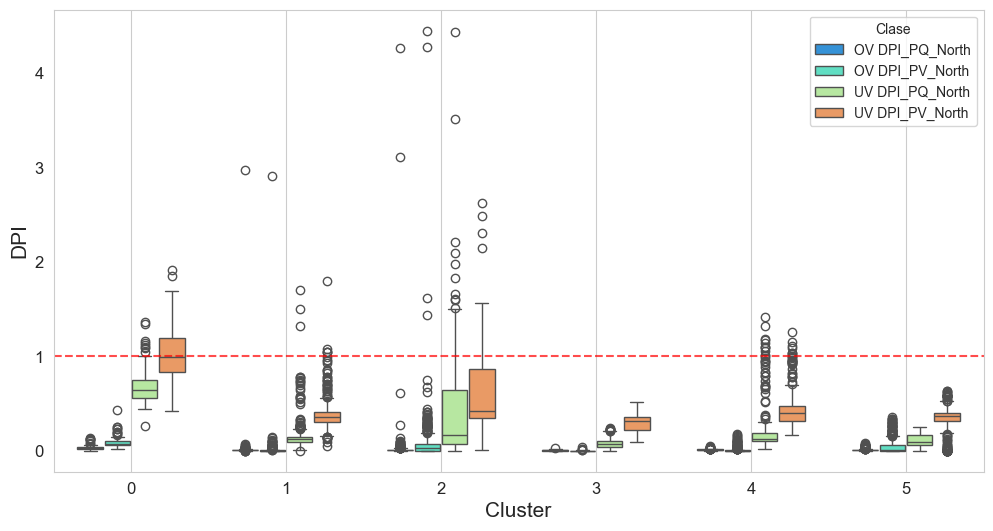

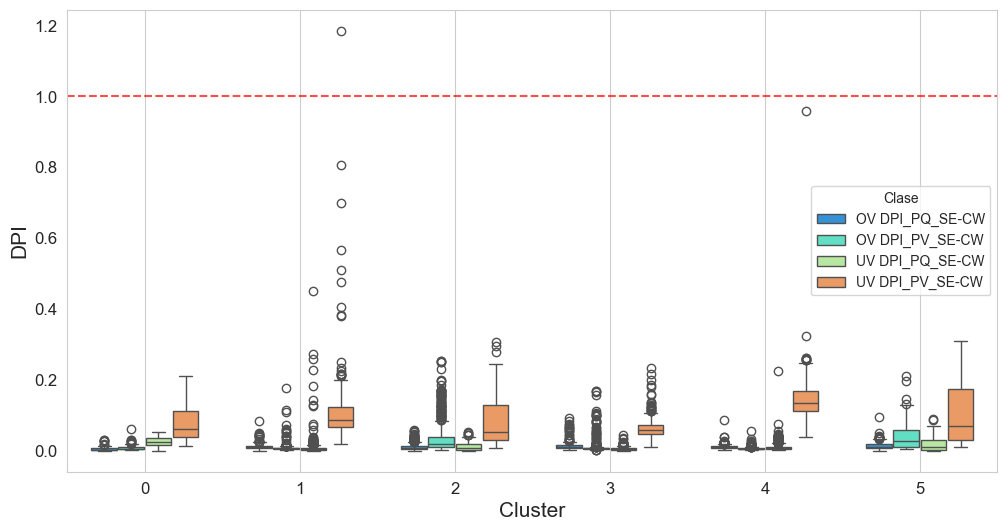

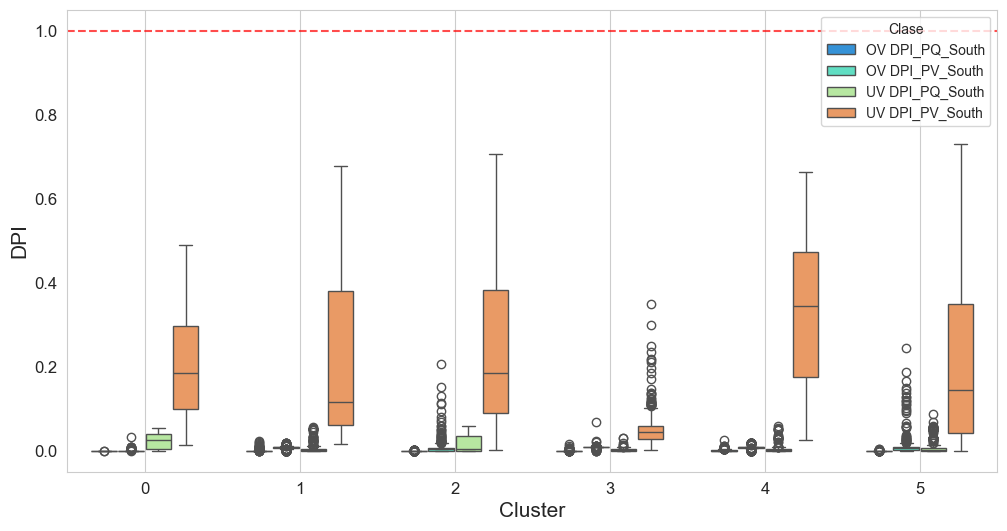

In [51]:
if ClusterEvaluation:
    dff = pd.melt(df[['OV DPI_PQ_AC-RO','UV DPI_PQ_AC-RO', 'OV DPI_PV_AC-RO', 'UV DPI_PV_AC-RO','Cluster']], id_vars=['Cluster'], value_vars=['OV DPI_PQ_AC-RO','UV DPI_PQ_AC-RO', 'OV DPI_PV_AC-RO', 'UV DPI_PV_AC-RO'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

    dff = pd.melt(df[['OV DPI_PQ_Northeast', 'UV DPI_PQ_Northeast', 'OV DPI_PV_Northeast', 'UV DPI_PV_Northeast','Cluster']], id_vars=['Cluster'], value_vars=['OV DPI_PQ_Northeast', 'UV DPI_PQ_Northeast', 'OV DPI_PV_Northeast', 'UV DPI_PV_Northeast'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

    dff = pd.melt(df[['OV DPI_PQ_North', 'UV DPI_PQ_North', 'OV DPI_PV_North', 'UV DPI_PV_North','Cluster']], id_vars=['Cluster'], value_vars=['OV DPI_PQ_North', 'UV DPI_PQ_North', 'OV DPI_PV_North', 'UV DPI_PV_North'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

    dff = pd.melt(df[['OV DPI_PQ_SE-CW', 'UV DPI_PQ_SE-CW', 'OV DPI_PV_SE-CW', 'UV DPI_PV_SE-CW','Cluster']], id_vars=['Cluster'], value_vars=['OV DPI_PQ_SE-CW', 'UV DPI_PQ_SE-CW', 'OV DPI_PV_SE-CW', 'UV DPI_PV_SE-CW'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

    dff = pd.melt(df[['OV DPI_PQ_South', 'UV DPI_PQ_South', 'OV DPI_PV_South', 'UV DPI_PV_South','Cluster']], id_vars=['Cluster'], value_vars=['OV DPI_PQ_South', 'UV DPI_PQ_South', 'OV DPI_PV_South', 'UV DPI_PV_South'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

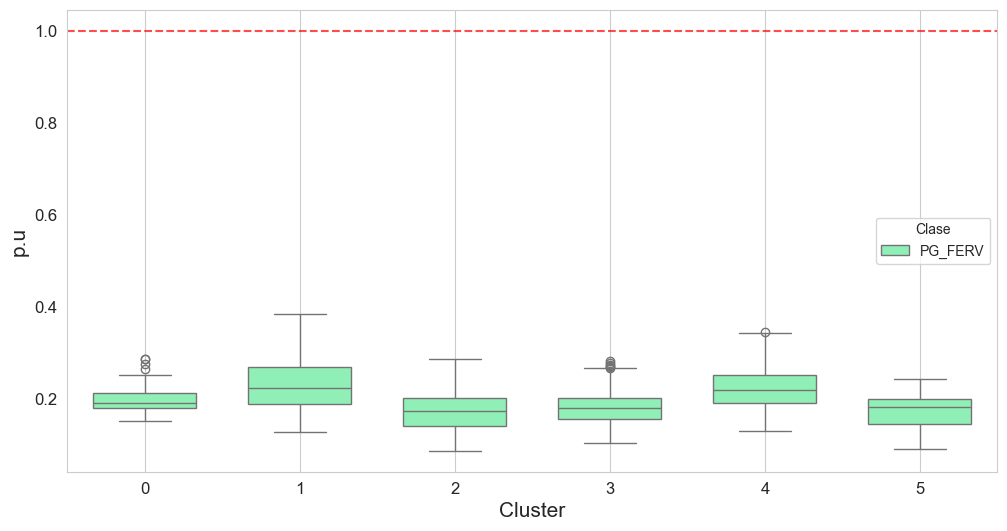

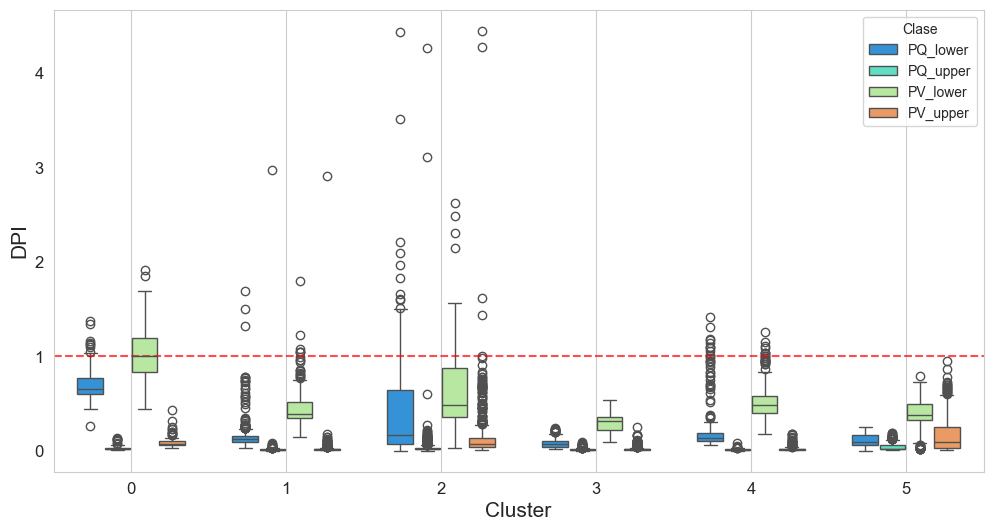

In [52]:
if ClusterEvaluation:
    dff = pd.melt(df[['PG_FERV','Cluster']], id_vars=['Cluster'], value_vars=['PG_FERV'], ignore_index = False).sort_values('Cluster')
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'p.u', 'variable', ylim = None,legendPos = False)
    dff = pd.melt(df[['PQ_lower', 'PV_lower','PQ_upper', 'PV_upper','Cluster']], id_vars=['Cluster'], value_vars=['PQ_lower', 'PV_lower','PQ_upper', 'PV_upper'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'DPI', 'variable', ylim = None)

In [44]:
if ClusterEvaluation:
    df['Cenario Hidrologico'] = df.index.to_frame()['Cenario'].apply(lambda x: x[:-3])
    dff = df[['Cenario Hidrologico','Cluster']].groupby(['Cenario Hidrologico','Cluster'])[['Cenario Hidrologico']].count().rename(columns={"Cenario Hidrologico": "count"}).sort_values('Cluster')
    fig = px.bar(dff.reset_index(), x="Cluster", y="count", color="Cenario Hidrologico", text_auto=True, color_continuous_scale='rainbow')
    fig.update_layout(
        title="",
        width=1000,  # Width of the figure in pixels
        height=600,  # Height of the figure in pixels
    )
    fig.show()

    dff = df.reset_index()[['Cenario','Cluster']].groupby(['Cenario','Cluster'])[['Cenario']].count().rename(columns={"Cenario": "count"}).sort_values('Cluster')
    fig = px.bar(dff.reset_index(), x="Cluster", y="count", color="Cenario", text_auto=True, color_continuous_scale='rainbow')
    fig.update_layout(
        title="",
        width=1000,  # Width of the figure in pixels
        height=600,  # Height of the figure in pixels
    )
    fig.show()

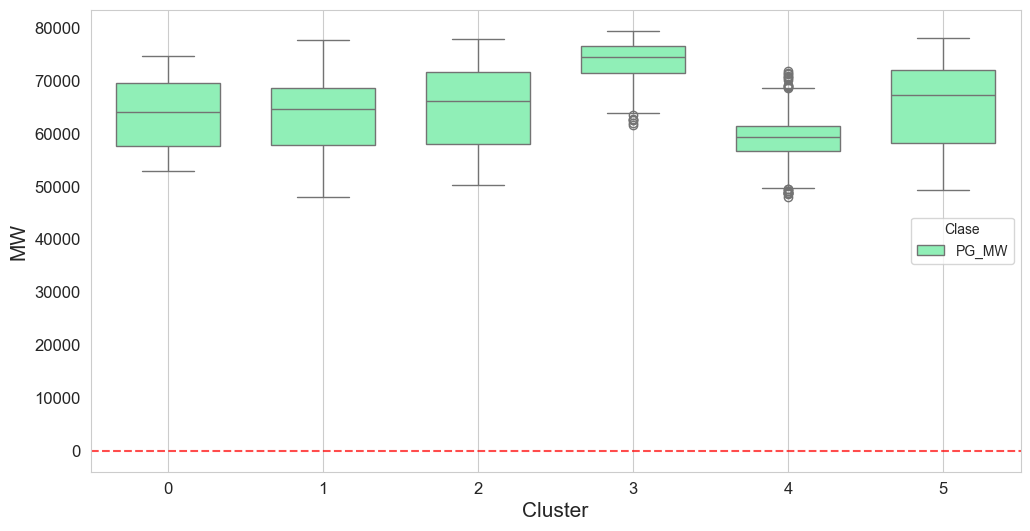

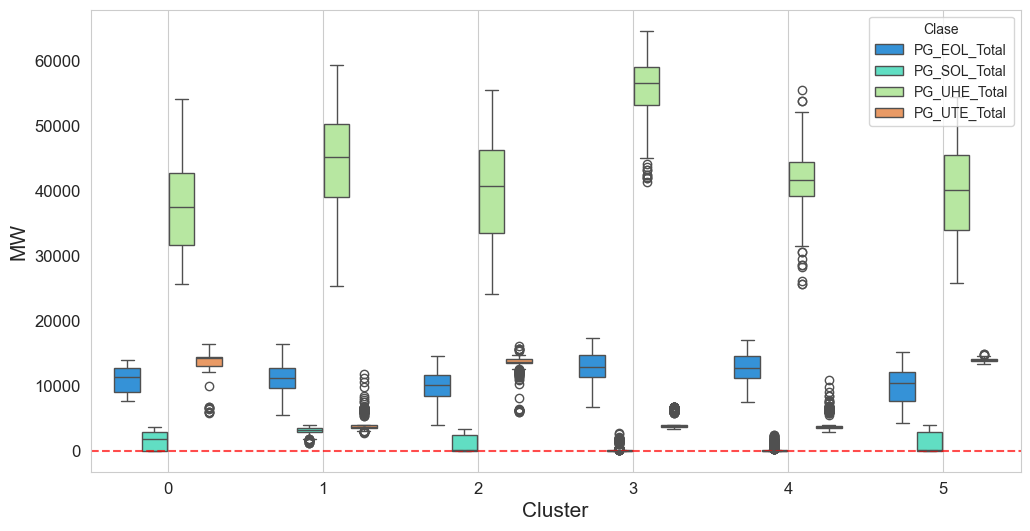

In [45]:
if ClusterEvaluation:
    dff = pd.melt(df[['PG_MW','Cluster']], id_vars=['Cluster'], value_vars=['PG_MW'], ignore_index = False).sort_values('Cluster')
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None)
    dff = pd.melt(df[['PG_UHE_Total', 'PG_UTE_Total', 'PG_EOL_Total', 'PG_SOL_Total','Cluster']], id_vars=['Cluster'], value_vars=['PG_UHE_Total', 'PG_UTE_Total', 'PG_EOL_Total', 'PG_SOL_Total', ], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None)

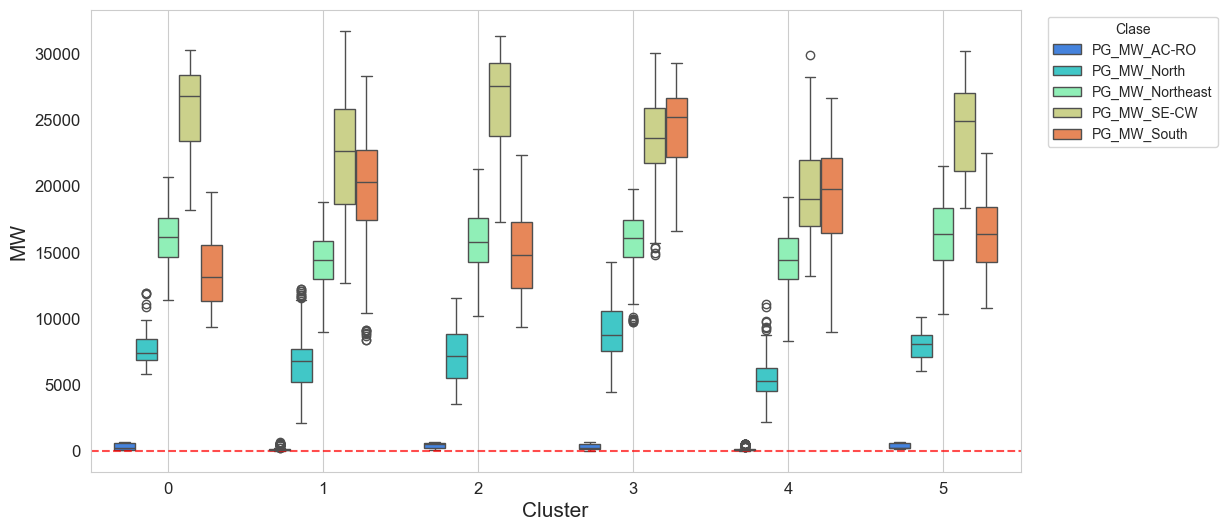

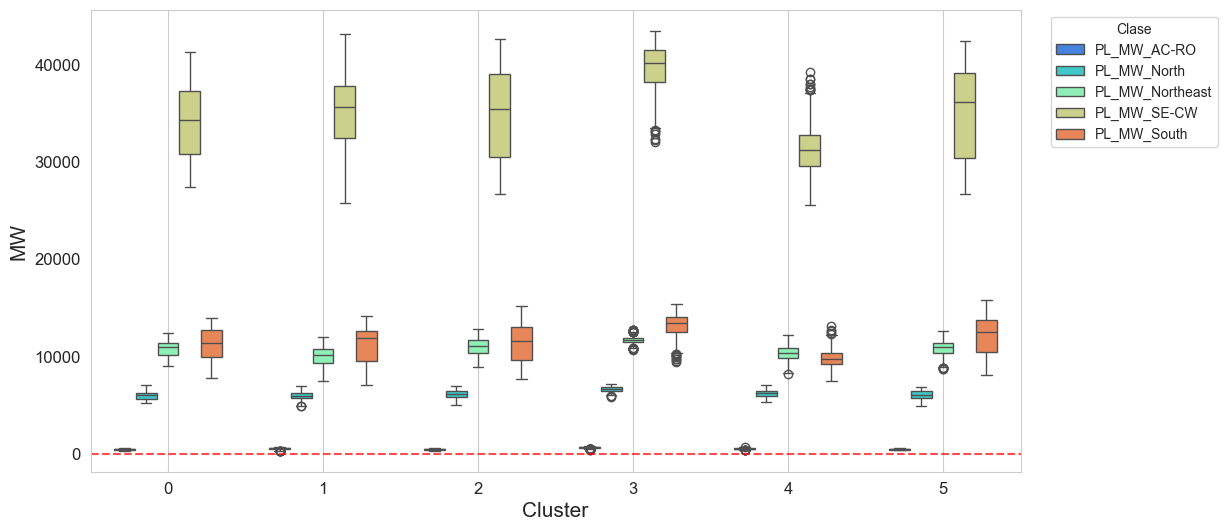

In [46]:
if ClusterEvaluation:
        cols = ['PG_MW_AC-RO',
                'PG_MW_Northeast',
                'PG_MW_North',
                'PG_MW_SE-CW',
                'PG_MW_South','Cluster'] 
        dff = pd.melt(df[cols], id_vars=['Cluster'], value_vars= cols[:-1], ignore_index = False).sort_values(['Cluster','variable'])
        boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None, legendPos=True)
        cols = ['PL_MW_AC-RO',
                'PL_MW_Northeast',
                'PL_MW_North',
                'PL_MW_SE-CW',
                'PL_MW_South','Cluster']
        dff = pd.melt(df[cols], id_vars=['Cluster'], value_vars= cols[:-1], ignore_index = False).sort_values(['Cluster','variable'])
        boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None, legendPos=True)

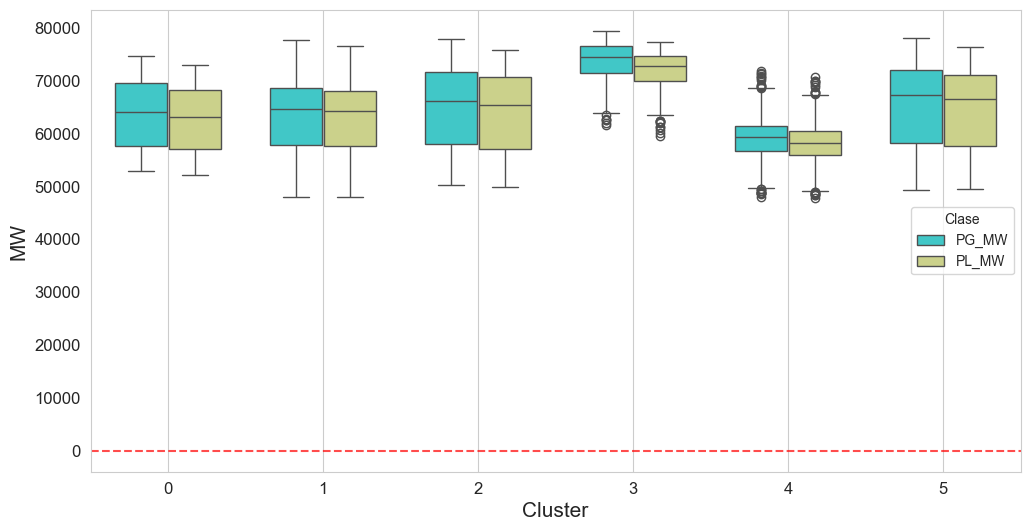

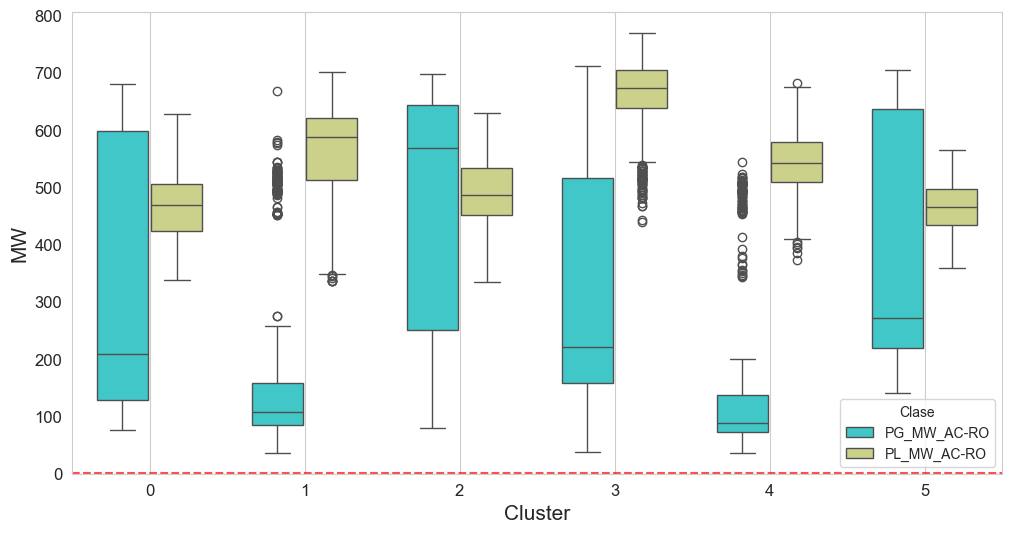

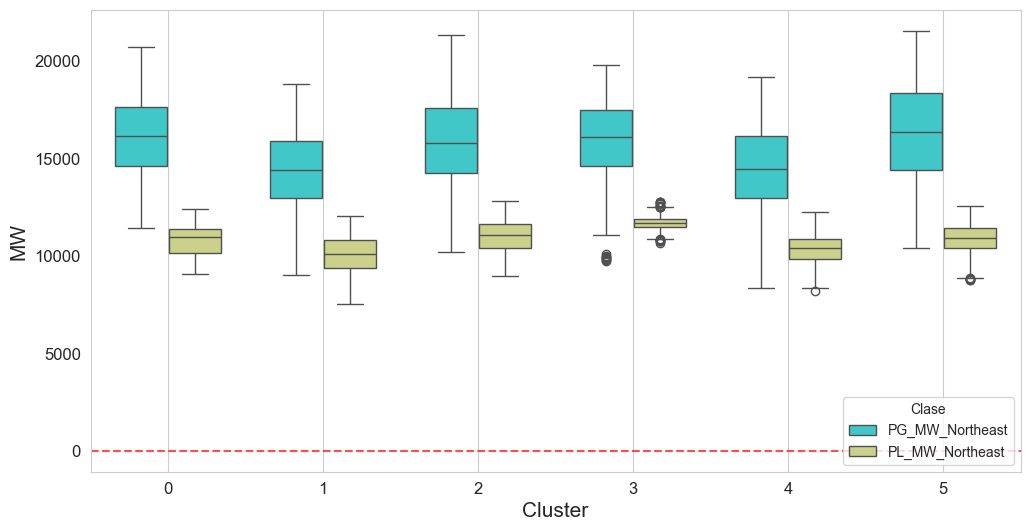

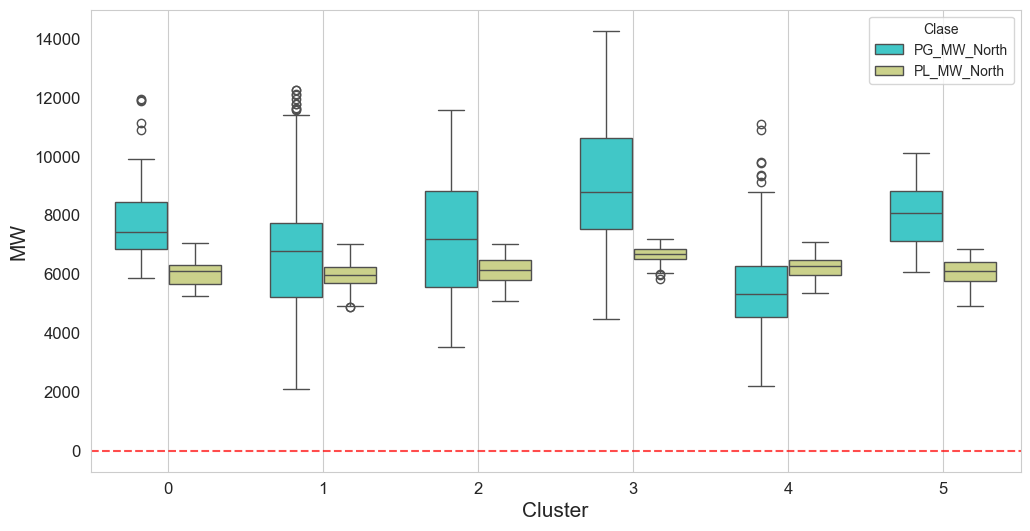

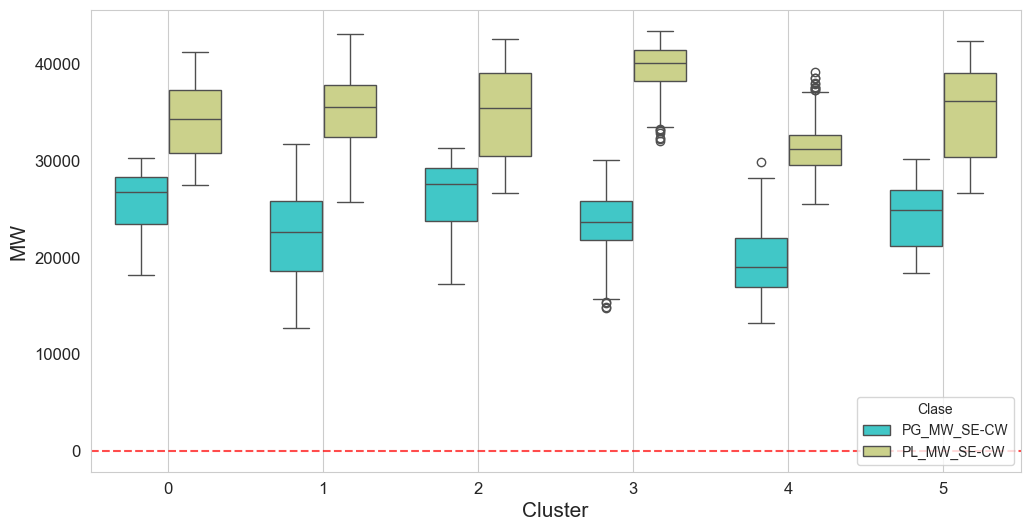

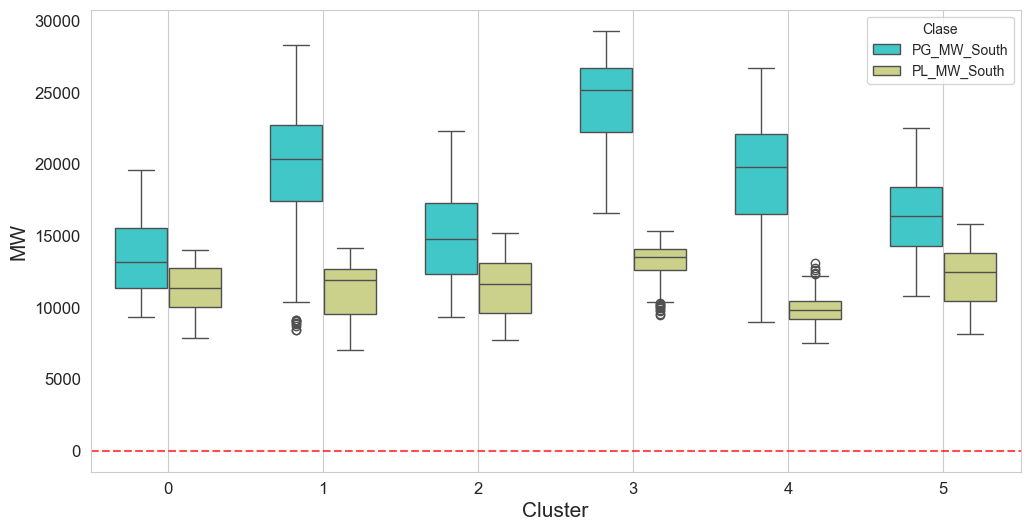

In [47]:
if ClusterEvaluation:
    dff = pd.melt(df[['PG_MW', 'PL_MW','Cluster']], id_vars=['Cluster'], value_vars=['PG_MW', 'PL_MW'], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None)
    cols = ['PG_MW_AC-RO','PL_MW_AC-RO','Cluster'] 
    dff = pd.melt(df[cols], id_vars=['Cluster'], value_vars= cols[:-1], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None,)
    cols = ['PG_MW_Northeast','PL_MW_Northeast','Cluster'] 
    dff = pd.melt(df[cols], id_vars=['Cluster'], value_vars= cols[:-1], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None)
    cols = ['PG_MW_North','PL_MW_North','Cluster'] 
    dff = pd.melt(df[cols], id_vars=['Cluster'], value_vars= cols[:-1], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None)
    cols = ['PG_MW_SE-CW','PL_MW_SE-CW','Cluster'] 
    dff = pd.melt(df[cols], id_vars=['Cluster'], value_vars= cols[:-1], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None)
    cols = ['PG_MW_South','PL_MW_South','Cluster'] 
    dff = pd.melt(df[cols], id_vars=['Cluster'], value_vars= cols[:-1], ignore_index = False).sort_values(['Cluster','variable'])
    boxplot_linhas(dff, 'Cluster', 'value' , '', 'Cluster', 'MW', 'variable', ylim = None)

In [48]:
if  showAutoEncoder == True:
    # label = df.reset_index()['PL_Total'].values
    if region != 'all':
        if region == 'PO':
            label = df.reset_index().loc[:,'Elo_XINGU-SE'].values
        else:
            label = df.reset_index().loc[:,'PL_MW'].values
    else:
        label = df.reset_index()['PL_MW'].values
    fig = px.scatter(x=proj["comp_1"], y=proj["comp_2"], color=label, color_continuous_scale='rainbow')
    fig.update_layout(
        title="Autoencoder",
        xaxis_title="First comp",
        yaxis_title="Second comp",
        width=800,  # Width of the figure in pixels
        height=600,  # Height of the figure in pixels
    )
    fig.show()
if  showTSNE == True:
    fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], color=label, color_continuous_scale='rainbow')
    # fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1])
    fig.update_layout(
        title="t-SNE",
        xaxis_title="First t-SNE",
        yaxis_title="Second t-SNE",
        width=800,  # Width of the figure in pixels
        height=600,  # Height of the figure in pixels
    )
    fig.show()

if  DimensioreductionPCA == True:
    label = df.reset_index().loc[:,'PL_MW'].values
    fig = px.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], color=label, color_continuous_scale='rainbow')
    # fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1])
    fig.update_layout(
        title="PCA",
        xaxis_title="First comp",
        yaxis_title="Second comp",
        width=800,  # Width of the figure in pixels
        height=600,  # Height of the figure in pixels
    )
    fig.show()